INTRODUCTION:

Anaconda est une distribution de Python et de R, populaire dans le domaine de la science des données, qui inclut un gestionnaire de paquets, des environnements virtuels et de nombreuses bibliothèques pré-installées.

Jupyter est une application web permettant de créer et de partager des documents interactifs, appelés notebooks, contenant du code, des visualisations et du texte.

Anaconda fournit l'environnement de développement et Jupyter offre une interface interactive pour créer et exécuter des notebooks contenant du code, des visualisations et des explications.

Ce rapport présente les résultats de la première partie du travail pratique (TP) intitulé "Exploration et Manipulation de Données". L'objectif de ce TP est d'initier les étudiants aux différentes étapes de prétraitement des données, essentielles dans le processus d'analyse de données et d'apprentissage automatique. Cette première partie du TP se concentre sur la manipulation et l'exploration d'un fichier de données, en utilisant des outils tels que pandas, scikit-learn et matplotlib.

Objectif de la première partie:

Dans cette première partie du TP, nous avons entrepris les étapes suivantes :

    Ouverture du fichier de données et exploration de son contenu.
    Lecture et affichage des données pour comprendre leur structure et leur format.
    Identification du nombre d'instances dans le jeu de données.
    Récapitulatif des attributs : noms, types et nombre.
    Calcul des principales statistiques descriptives pour chaque attribut : minimum, maximum, médiane, premier quartile (Q1) et troisième quartile (Q3).
    Tracé des boxplots pour visualiser la distribution des données pour chaque attribut sur un même graphe.
    Affichage du scatter plot pour explorer les relations entre les différentes variables.
    Calcul du mode, de la moyenne et de la médiane pour chaque attribut.
    Repérage et remplacement des valeurs manquantes, le cas échéant.
    Normalisation des données en utilisant les méthodes Min/Max et Z-score.

In [ ]:
import csv
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

    csv: Lecture et écriture de fichiers CSV.
    numpy: Manipulation de tableaux multidimensionnels.
    matplotlib: Visualisation de données.
    pandas: Manipulation et analyse de données tabulaires.
    seaborn: Création de graphiques statistiques.

Lecture et affichage des données

In [ ]:
# Le chemin du fichier CSV
fichier_csv = '/home/ayoublb/Téléchargements/heart.csv'

# Lire le fichier CSV et stocker les données dans une liste
donnees_csv = []
with open(fichier_csv, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        donnees_csv.append(row)

# Afficher les données
print("Contenu du fichier CSV :")
for row in donnees_csv:
    print(row)


Contenu du fichier CSV :
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
['60', '1', '3', '145', '233', '1', '0', '150', '0', '2.3', '0', '0', '1', '1']
['35', '1', '2', '130', '250', '0', '1', '187', '0', '3.5', '0', '0', '2', '1']
['41', '0', '1', '130', '204', '0', '0', '172', '0', '1.4', '2', '0', '2', '1']
['55', '1', '1', '120', '236', '0', '1', '178', '0', '0.8', '2', '0', '2', '1']
['56', '0', '0', '120', '354', '0', '1', '163', '1', '0.6', '2', '0', '2', '1']
['55', '1', '0', '140', '192', '0', '1', '148', '0', '0.4', '1', '0', '1', '1']
['56', '0', '1', '140', '294', '0', '0', '153', '0', '1.3', '1', '0', '2', '1']
['44', '1', '1', '120', '263', '0', '1', '173', '0', '0', '2', '0', '3', '1']
['52', '1', '2', '172', '199', '1', '1', '162', '0', '0.5', '2', '0', '3', '1']
['57', '1', '2', '150', '168', '0', '1', '174', '0', '1.6', '2', '0', '2', '1']
['54', '1', '0', '140', '239', '0', '1', '160', '0', '1.

Description des données :
Le jeu de données utilisé dans cette analyse provient du benchmark "heart.csv". Il s'agit d'un ensemble de données médicales contenant des informations sur des patients et des facteurs de risque associés aux maladies cardiaques. Les données sont extraites de différentes sources médicales et de recherche.

Explication des méthodes utilisées :
l'utilisation de csv.reader() est une approche simple, robuste et efficace pour lire des fichiers CSV en Python, ce qui en fait un choix judicieux pour de nombreuses applications.

In [ ]:
# Fonction pour afficher les données distinctes d'un attribut
def afficher_donnees_distinctes(attribut):
    global donnees_csv
    if attribut.isdigit() and 1 <= int(attribut) <= len(donnees_csv[0]):
        index_attribut = int(attribut) - 1
        nom_attribut = donnees_csv[0][index_attribut]  # Récupérer le nom de l'attribut
        valeurs_distinctes = set(row[index_attribut] for row in donnees_csv[1:])  # Ignorer la première ligne
        print(f"Valeurs distinctes de l'attribut '{nom_attribut}':")
        for valeur in valeurs_distinctes:
            print(valeur)
    else:
        print("Numéro d'attribut invalide.")

# Demander à l'utilisateur de saisir un attribut jusqu'à ce qu'il entre "q" pour quitter
while True:
    attribut = input("Entrez le numéro de l'attribut (ou 'q' pour quitter) : ")
    if attribut.lower() == 'q':
        break
    else:
        afficher_donnees_distinctes(attribut)


Entrez le numéro de l'attribut (ou 'q' pour quitter) :  q


j'ai ajouté cette fonction pour repondre a la question de l'enseignante, c'est une fonction pour afficher les données distinctes d'un attribut. l'utilisateur doit entrer le numéro de l'attribut et elle va afficher les valeurs distinctes.

In [5]:
# Calculer le nombre d'instances
nombre_instances = len(donnees_csv)
print("\nNombre total d'instances :", nombre_instances)



Nombre total d'instances : 290


In [6]:
if donnees_csv:
    # Extrait la première ligne du données pour obtenir les noms des attributs
    noms_attributs = donnees_csv[0]

    # Nombre total d'attributs
    nombre_attributs = len(noms_attributs)
    print("Nombre total d'attributs :", nombre_attributs)

    # Afficher les noms des attributs et leur type
    print("\nNoms des attributs :")
    for attribut in noms_attributs:
        print("-", attribut)  # Affiche le nom de l'attribut
else:
    print("Aucune donnée trouvée.")


Nombre total d'attributs : 14

Noms des attributs :
- age
- sex
- cp
- trtbps
- chol
- fbs
- restecg
- thalachh
- exng
- oldpeak
- slp
- caa
- thall
- output


On utilise la fonction len() pour obtenir la longueur de la premiere ligne (attributs), qui represente la nombre d'attributs. On parcourt la premiere ligne stocké sur la variable noms_attributs et on affiche les noms.

Tous les fonction précedents permettent de comprendre la structure et la nature des données avec lesquelles nous travaillons, ce qui est essentiel pour prendre des décisions éclairées tout au long du processus d'analyse.

Les données dans le fichier CSV sont principalement de type numérique.

In [7]:
donnees = pd.read_csv('/home/ayoublb/Téléchargements/heart.csv')
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB


In [8]:

# Lire le fichier CSV avec Pandas
donnees = pd.read_csv(fichier_csv)

def afficher_menu():
    print("Menu :")
    print("a. Calcul automatique (Min, Max, Médiane, Q1, Q3)")
    print("m. Calcul manuel")
    print("q. Quitter")

def calcul_automatique(donnees):
    # Calcul automatique
    print("\nCalcul automatique :")
    minvaleurs = donnees.min()
    maxvaleurs = donnees.max()
    medianes = donnees.median()
    q1 = donnees.quantile(0.25)
    q3 = donnees.quantile(0.75)

    # Affichage des résultats pour chaque attribut
    noms_attributs = donnees.columns
    for i, nom_attribut in enumerate(noms_attributs):
        print("Attribut :", nom_attribut)
        print("Min :", minvaleurs.iloc[i])  # Utilisation de .iloc[] pour éviter les avertissements FutureWarning
        print("Max :", maxvaleurs.iloc[i])  
        print("Médiane :", medianes.iloc[i])
        print("Q1 :", q1.iloc[i])
        print("Q3 :", q3.iloc[i]) 
        print()


# Fonction pour calculer le minimum manuellement
def Min(donnees):
    min_valeur = donnees.min()  # Calcul du minimum de la série de données
    return min_valeur

# Fonction pour calculer le maximum manuellement
def Max(donnees):
    max_valeur = donnees.max()  # Calcul du maximum de la série de données
    return max_valeur


# Fonction pour calculer la médiane
def Med(attribut):
    if attribut in donnees.columns:
        # Trier les valeurs de l'attribut spécifié
        data_sorted = sorted(donnees[attribut])
        # Calculer le nombre d'éléments dans les données
        n = len(data_sorted)
        # Calculer la médiane en fonction du nombre d'éléments
        if n % 2 == 0:
            # Si le nombre d'éléments est pair, prendre la moyenne des deux valeurs médianes
            mediane = (data_sorted[n//2 - 1] + data_sorted[n//2]) / 2
        else:
            # Si le nombre d'éléments est impair, prendre la valeur médiane centrale
            mediane = data_sorted[n//2]
        # Afficher la médiane calculée
        print(f"La médiane de l'attribut '{attribut}' est : {mediane}")
    else:
        # Si l'attribut spécifié n'existe pas, afficher un message d'erreur
        print("L'attribut spécifié n'existe pas dans les données.")

# Fonction pour calculer le premier quartile (Q1)
def Q1(attribut):
    if attribut in donnees.columns:
        # Trier les valeurs de l'attribut spécifié
        data_sorted = sorted(donnees[attribut])
        # Calculer le nombre d'éléments dans les données
        n = len(data_sorted)
        # Calculer l'index du premier quartile
        q1_index = n // 4
        # Calculer le premier quartile en fonction du nombre d'éléments
        if n % 4 == 0:
            # Si le nombre d'éléments est un multiple de 4, prendre la moyenne des deux valeurs au milieu
            q1 = (data_sorted[q1_index - 1] + data_sorted[q1_index]) / 2
        else:
            # Sinon, prendre la valeur au milieu
            q1 = data_sorted[q1_index]
        # Afficher le premier quartile calculé
        print(f"Le premier quartile (Q1) de l'attribut '{attribut}' est : {q1}")
    else:
        # Si l'attribut spécifié n'existe pas, afficher un message d'erreur
        print("L'attribut spécifié n'existe pas dans les données.")

# Fonction pour calculer le troisième quartile (Q3)
def Q3(attribut):
    if attribut in donnees.columns:
        # Trier les valeurs de l'attribut spécifié
        data_sorted = sorted(donnees[attribut])
        # Calculer le nombre d'éléments dans les données
        n = len(data_sorted)
        # Calculer l'index du troisième quartile
        q3_index = 3 * n // 4
        # Calculer le troisième quartile en fonction du nombre d'éléments
        if n % 4 == 0:
            # Si le nombre d'éléments est un multiple de 4, prendre la moyenne des deux valeurs au milieu
            q3 = (data_sorted[q3_index - 1] + data_sorted[q3_index]) / 2
        else:
            # Sinon, prendre la valeur au milieu
            q3 = data_sorted[q3_index]
        # Afficher le troisième quartile calculé
        print(f"Le troisième quartile (Q3) de l'attribut '{attribut}' est : {q3}")
    else:
        # Si l'attribut spécifié n'existe pas, afficher un message d'erreur
        print("L'attribut spécifié n'existe pas dans les données.")


def calcul_manuel(donnees):
    for attribut in donnees.columns:
        print(f"\nAttribut : {attribut}")
        min_resultat = Min(donnees[attribut])  # Correction : Passer la colonne de données à la fonction Min
        max_resultat = Max(donnees[attribut])  
        print("Minimum :", min_resultat)  
        print("Maximum :", max_resultat)
        Med(attribut)  
        Q1(attribut)  
        Q3(attribut)


while True:
    afficher_menu()
    choix = input("Choix : ")

    if choix == 'a':
        calcul_automatique(donnees)
    elif choix == 'm':
        calcul_manuel(donnees)
    elif choix.lower() == 'q':
        print("Au revoir !")
        break
    else:
        print("Choix invalide. Veuillez réessayer.")


Menu :
a. Calcul automatique (Min, Max, Médiane, Q1, Q3)
m. Calcul manuel
q. Quitter


Choix :  q


Au revoir !


Description des données :
La compréhension des statistiques descriptives telles que la moyenne, la médiane, les quartiles, etc., nous donne un aperçu de la distribution des données et des valeurs atypiques éventuelles.

Interprétation des résultats :
Ces résultats représentent les statistiques descriptives calculées pour chaque attribut du jeu de données. Voici une interprétation pour quelques mesure :

    Min (Minimum) : Il s'agit de la plus petite valeur observée pour chaque attribut. Par exemple, pour l'attribut "age", l'âge minimum est de 29 ans.

    Max (Maximum) : C'est la plus grande valeur observée pour chaque attribut. Par exemple, pour l'attribut "age", l'âge maximum est de 77 ans.

    Médiane : C'est la valeur qui divise la distribution en deux parties égales. Pour l'attribut "age", la médiane est de 54 ans, ce qui signifie que la moitié des individus ont moins de 54 ans et l'autre moitié a plus de 54 ans.

    Q1 (Premier quartile) : C'est la valeur en dessous de laquelle se trouve le 25e percentile des données. Pour l'attribut "age", le premier quartile est de 47 ans, ce qui indique que 25% des individus ont moins de 47 ans.

    Q3 (Troisième quartile) : C'est la valeur en dessous de laquelle se trouve le 75e percentile des données. Pour l'attribut "age", le troisième quartile est de 60 ans, ce qui signifie que 75% des individus ont moins de 60 ans.


Explication des méthodes utilisées :
Une deuxième lecture de données avec Pandas en tant que DataFrame pour démontrer une méthode alternative à la première. Ici, l'objectif est simplement de montrer les deux méthodes. La méthode utilisée consiste à charger les données à partir d'un fichier CSV

La fonction afficher_menu() affiche un menu à l'utilisateur avec les options pour effectuer des calculs automatiques ou manuels, ou pour quitter le programme.
La fonction calcul_manuel() permet à l'utilisateur de calculer manuellement le minimum, le maximum, le Median , Q1 et Q3 pour chaque attribut. en utilisant les fonctions Min() , Max() , Med(), Q1() et Q3() qui ont programmé.
les fonction Max, Min, Med, Q1, et Q3 sont concues pour calculer les 5 valeurs manuelementde de maniere mathématique.
La fonction calcul_manuel() pour regrouper tout ces fonction et afficher les resultats.

Les quartiles sont des valeurs qui divisent un ensemble de données ordonnées en quatre parties égales.
Pour calculer les quartiles, vous devez d'abord trier les données.

In [9]:
etiquettes_attributs = donnees.columns[:-1]

while True: #jusqu'à ce que l'utilisateur décide de quitter le programme.
    # Demander à l'utilisateur de saisir le numéro de l'attribut à afficher
    num_attribut = input("Entrez le numéro de l'attribut à afficher (ou 'a' pour afficher tous les boxplots ou 'q' pour quitter) : ")

    # Vérifier si l'utilisateur veut quitter
    if num_attribut.lower() == 'q':
        print("Programme terminé.")
        break
    elif num_attribut.lower() == 'a':
        # Afficher tous les boxplots dans un seul graphe
        plt.figure(figsize=(12, 8))  # Taille de la figure
        positions = range(len(etiquettes_attributs))  # Positions des boxplots sur l'axe x
        plt.boxplot(donnees.to_numpy()[:, :-1], positions=positions, labels=etiquettes_attributs, showmeans=True)  # Tracé des boxplots
        plt.title('Boxplots de tous les attributs')  # Titre du graphe
        plt.xlabel('Attributs')  # Étiquette de l'axe x
        plt.ylabel('Valeurs')  # Étiquette de l'axe y
        plt.xticks(rotation=45)  # Rotation des étiquettes d'attributs pour une meilleure lisibilité
        plt.grid(True)  # Afficher la grille
        plt.autoscale(enable=True, axis='y', tight=True)  # Ajustement automatique des limites de l'axe y
        plt.tight_layout()  # Ajustement automatique des sous-graphiques pour éviter les chevauchements
        plt.subplots_adjust(bottom=0.2)  # Ajuster les marges pour permettre la place aux boutons de navigation
        plt.show()  # Afficher la figure
    else:
        try:
            # Convertir le numéro d'attribut en entier
            num_attribut = int(num_attribut)

            # Vérifier si le numéro d'attribut est valide
            if 0 <= num_attribut < len(etiquettes_attributs):
                # Conversion en tableau NumPy
                donnees_np = donnees.to_numpy()
                plt.figure(figsize=(6, 4))
                plt.boxplot(donnees_np[:, num_attribut], labels=[etiquettes_attributs[num_attribut]], showmeans=True)
                plt.title(f'Boxplot de {etiquettes_attributs[num_attribut]}')
                plt.xlabel('Attribut')
                plt.ylabel('Valeurs')
                plt.grid(True)
                plt.tight_layout()  # Ajustement automatique des sous-graphiques pour éviter les chevauchements
                plt.subplots_adjust(bottom=0.2)  # Ajuster les marges pour permettre la place aux boutons de navigation
                plt.show()
            else:
                print("Numéro d'attribut invalide. Veuillez saisir un numéro d'attribut valide.")
        except ValueError:
            print("Veuillez saisir un numéro d'attribut valide ou 'q' pour quitter.")


Entrez le numéro de l'attribut à afficher (ou 'a' pour afficher tous les boxplots ou 'q' pour quitter) :  q


Programme terminé.


Description des données :

Les boxplots permettent de voir la dispersion, la médiane, ainsi que les quartiles des données, ce qui aide à identifier les valeurs aberrantes (outliers) et à avoir une meilleure compréhension de la répartition des données.

Interprétation des résultats :
Âge (age) :

    Tendance : La distribution des âges semble être relativement uniforme, avec une moyenne proche de la médiane, indiquant une distribution symétrique.
    Écart : L'écart entre l'âge minimum et maximum est de 48 ans, montrant une grande variabilité dans les âges des individus.

Sexe (sex) :

    Tendance : La majorité des individus sont de sexe masculin, comme indiqué par la moyenne supérieure à 0.5.
    Écart : L'écart est de 1, indiquant qu'il y a une seule unité d'écart entre les deux catégories possibles (0 pour femme, 1 pour homme).

Taux de sucre dans le sang à jeun (fbs) :

    Tendance : La majorité des individus ont un taux de sucre dans le sang à jeun inférieur à 1.
    Écart : La variance est faible, avec la plupart des valeurs concentrées autour de zéro.

Explication des méthodes utilisées :
Le programme démarre une boucle while qui continue jusqu'à ce que l'utilisateur décide de quitter en entrant 'q'.

À chaque itération de la boucle, l'utilisateur est invité à entrer le numéro d'un attribut à afficher ou à entrer 'a' pour afficher tous les boxplots dans un seul graphe.

Si l'utilisateur entre 'q', le programme se termine. Si l'utilisateur entre 'a', tous les boxplots sont affichés dans un seul graphe. Sinon, le programme vérifie si l'entrée de l'utilisateur est un numéro d'attribut valide.

Si l'entrée est un numéro d'attribut valide, un boxplot pour cet attribut est affiché. Sinon, un message d'erreur est affiché.

Les boxplots sont générés en utilisant la méthode boxplot de Matplotlib. Les données sont extraites du DataFrame et converties en tableau NumPy pour le tracé.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('/home/ayoublb/Téléchargements/heart.csv')

# Récupérer les noms des attributs
attributs = df.columns[:-1]  # Exclure la dernière colonne qui contient la classe cible

while True:
    # Demander à l'utilisateur de saisir les numéros des deux attributs à afficher (ou 'q' pour quitter)
    num_attribut1 = input("Entrez le numéro du premier attribut à afficher (ou 'q' pour quitter) : ")
    if num_attribut1.lower() == 'q':
        print("Programme terminé.")
        break

    num_attribut2 = input("Entrez le numéro du deuxième attribut à afficher (ou 'q' pour quitter) : ")
    if num_attribut2.lower() == 'q':
        print("Programme terminé.")
        break

    try:
        # Convertir les numéros d'attributs en entiers
        num_attribut1 = int(num_attribut1)
        num_attribut2 = int(num_attribut2)

        # Vérifier si les numéros d'attributs sont valides
        if 0 <= num_attribut1 < len(attributs) and 0 <= num_attribut2 < len(attributs):
            attribut_selectionne1 = attributs[num_attribut1]
            attribut_selectionne2 = attributs[num_attribut2]
            sns.scatterplot(x=attribut_selectionne1, y=attribut_selectionne2, data=df)
            plt.xlabel(attribut_selectionne1)
            plt.ylabel(attribut_selectionne2)
            plt.title(f'Scatter plot entre {attribut_selectionne1} et {attribut_selectionne2}')
            plt.show()
        else:
            print("Numéro d'attribut invalide. Veuillez saisir des numéros d'attributs valides.")
    except ValueError:
        print("Veuillez saisir des numéros d'attributs valides ou 'q' pour quitter.")


Entrez le numéro du premier attribut à afficher (ou 'q' pour quitter) :  q


Programme terminé.


Description des données :

Les visualisations telles que les boxplots et les scatter plots offrent une représentation graphique des données, ce qui facilite l'identification de tendances, de corrélations et de modèles.

Interprétation des résultats :

Âge vs. Cholestérol (chol) :
Il semble y avoir une légère tendance à ce que le cholestérol augmente avec l'âge, bien que la dispersion des points soit assez large, ce qui signifie que la relation n'est pas strictement linéaire.

Âge vs. Dépression de l'ECG par rapport au repos (oldpeak) :
Interprétation : Il semble y avoir une variabilité importante dans la dépression de l'ECG par rapport au repos, sans tendance claire avec l'âge. Cela indique que d'autres facteurs que l'âge peuvent influencer cette mesure.

Explication des méthodes utilisées :

le programme demande à l'utilisateur de saisir le numéro de l'attribut à afficher dans le scatter plot ou de saisir 'q' pour quitter.
Si l'utilisateur saisit un numéro valide, le programme affiche le scatter plot entre l'âge et l'attribut sélectionné à l'aide de la bibliothèque Seaborn.
Le titre du scatter plot indique l'attribut sélectionné, et les axes sont étiquetés en conséquence (âge sur l'axe x et l'attribut sélectionné sur l'axe y).
Le graphique est affiché à l'utilisateur, qui peut ensuite choisir de continuer à afficher d'autres scatter plots ou de quitter le programme.

La difference entre skalterplot et boxplot 
un scatterplot est utilisé pour visualiser la relation entre deux variables continues, tandis qu'un boxplot est utilisé pour résumer la distribution des valeurs d'une variable et identifier les caractéristiques importantes de cette distribution.

In [12]:

def calculer_mode(df):
    modes = df.mode().iloc[0]
    return modes

def calculer_moyenne(df):
    moyennes = df.mean()
    return moyennes

def calculer_mediane(df):
    medianes = df.median()
    return medianes

def afficher_resultats(modes, moyennes, medianes):
    for attribut in df.columns:
        print(f"Attribut : {attribut}")
        print(f"Mode : {modes[attribut]}")
        print(f"Mean : {moyennes[attribut]}")
        print(f"Median : {medianes[attribut]}")
        print()

def calculer_modeM(df):
    # Calculer le mode pour chaque attribut
    modes = {}
    for attribut in df.columns:
        count = 0  # Initialiser le compteur du mode à zéro
        mode_value = None  # Initialiser la valeur du mode à None
        occurrences = {}  # Dictionnaire pour stocker les occurrences de chaque valeur
        for i in df[attribut]:  # Parcourir les valeurs de l'attribut
            if i not in occurrences:  # Si la valeur n'est pas déjà présente dans le dictionnaire
                occurrences[i] = 1  # Ajouter la valeur au dictionnaire avec une occurrence de 1
            else:
                occurrences[i] += 1  # Si la valeur est déjà présente, augmenter son occurrence de 1
            if occurrences[i] > count:  # Vérifier si l'occurrence actuelle est supérieure au mode actuel
                count = occurrences[i]  # Mettre à jour le compteur du mode
                mode_value = i  # Mettre à jour la valeur du mode
        modes[attribut] = mode_value  # Stocker la valeur du mode pour l'attribut
    return modes

def calculer_moyenneM(df):
    # Calculer la moyenne (mean) pour chaque attribut
    moyennes = {}
    for attribut in df.columns:
        total = sum(df[attribut])  # Calculer la somme de toutes les valeurs de l'attribut
        nombre_instances = len(df[attribut])  # Calculer le nombre total d'instances de l'attribut
        moyennes[attribut] = total / nombre_instances  # Calculer la moyenne et la stocker
    return moyennes

def calculer_medianeM(df):
    # Calculer la médiane pour chaque attribut
    medianes = {}
    for attribut in df.columns:
        valeurs_triees = sorted(df[attribut])  # Trier les valeurs de l'attribut
        n = len(valeurs_triees)  # Calculer la taille de l'échantillon
        if n % 2 == 0:  # Si le nombre d'éléments est pair
            mediane = (valeurs_triees[n//2 - 1] + valeurs_triees[n//2]) / 2  # Calculer la moyenne des deux valeurs au milieu
        else:  # Si le nombre d'éléments est impair
            mediane = valeurs_triees[n//2]  # Sélectionner la valeur au milieu
        medianes[attribut] = mediane  # Stocker la médiane pour l'attribut
    return medianes

def afficher_resultatsM(modes, moyennes, medianes):
    # Afficher les résultats pour chaque attribut
    for attribut in df.columns:
        print(f"Attribut : {attribut}")
        print(f"Mode : {modes[attribut]}")
        print(f"Mean : {moyennes[attribut]}")
        print(f"Median : {medianes[attribut]}")
        print()

while True:
    print("Menu :")
    print("a. Calcul automatique (Mode, Moyenne, Médiane)")
    print("m. Calcul manuel")
    print("q. Quitter")

    choix = input("Choix : ")

    if choix.lower() == 'a':
        modes = calculer_mode(df)
        moyennes = calculer_moyenne(df)
        medianes = calculer_mediane(df)
        afficher_resultats(modes, moyennes, medianes)
    elif choix.lower() == 'm':
        modes = calculer_modeM(df)
        moyennes = calculer_moyenneM(df)
        medianes = calculer_medianeM(df)
        afficher_resultatsM(modes, moyennes, medianes)
    elif choix.lower() == 'q':
        print("Au revoir !")
        break
    else:
        print("Choix invalide. Veuillez réessayer.")


Menu :
a. Calcul automatique (Mode, Moyenne, Médiane)
m. Calcul manuel
q. Quitter


Choix :  q


Au revoir !


Interprétation des résultats :

Âge:

    Le mode, la moyenne et la médiane sont tous proches de 54 ans, indiquant une concentration autour de cette valeur. Cela indique que la plupart des individus ont environ 54 ans.

Sexe (sex) :

    Le mode et la médiane sont à 1, ce qui indique qu'il y a probablement plus d'hommes dans le jeu de données. La moyenne de 0.68 indique une légère tendance vers les hommes.

Niveau de sucre dans le sang à jeun (fbs) :

    Le mode et la médiane sont à 0, indiquant que la plupart des individus ont un niveau de sucre dans le sang à jeun inférieur à la moyenne. La moyenne est de 0.15, ce qui confirme cette tendance.

Explication des méthodes utilisées :

Ce code propose à l'utilisateur deux options : le calcul automatique ou manuel du mode, de la moyenne et de la médiane pour chaque attribut d'un dataframe. Une fois l'utilisateur a fait son choix, les résultats sont affichés.

In [8]:
import pandas as pd
from scipy.io import arff
import os

def replace_missing_values(file_path):
    # Vérifier l'extension du fichier pour déterminer le type
    file_extension = os.path.splitext(file_path)[1]
    if file_extension == '.csv':
        # Lire le fichier CSV en spécifiant le symbole "?" comme valeur manquante
        df = pd.read_csv(file_path, na_values=['?'])
    elif file_extension == '.arff':
        # Charger le fichier ARFF
        with open(file_path, 'r') as f:
            data, meta = arff.loadarff(f)
        df = pd.DataFrame(data)
        # Remplacer les '?' par NaN
        df.replace(b'?', pd.NA, inplace=True)
    else:
        raise ValueError("Format de fichier non pris en charge. Veuillez fournir un fichier CSV ou ARFF.")
    
    # Remplacer les valeurs manquantes par la moyenne de chaque colonne pour les variables numériques
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])  # Remplacer les valeurs manquantes par le mode pour les variables nominales

    
    # Enregistrer le DataFrame modifié dans un nouveau fichier avec la même extension que le fichier d'origine
    modified_file_path = file_path.replace('.arff', '_modified.arff').replace('.csv', '_modified.csv')
    df.to_csv(modified_file_path, index=False) if file_extension == '.csv' else df.to_csv(modified_file_path, index=False, header=None)
    
    # Repérer les valeurs manquantes pour tous les attributs
    missing_values = df.isnull().sum()
    
    return missing_values

# Chemin vers le fichier CSV ou ARFF
file_path = '/home/ayoublb/Documents/S2/DATAMINING/projectJ/horse-colic.csv'
#file_path = '/home/ayoublb/Documents/S2/DATAMINING/projectJ/hepatitisequilibre.arff'
# Remplacer les valeurs manquantes par la moyenne de chaque attribut
missing_values = replace_missing_values(file_path)

print("Valeurs manquantes remplacées et enregistrées dans un nouveau fichier 'modified_file.csv' ou 'modified_file.arff'.")
print("Nombre de valeurs manquantes remplacées par colonne :\n", missing_values)


Valeurs manquantes remplacées et enregistrées dans un nouveau fichier 'modified_file.csv' ou 'modified_file.arff'.
Nombre de valeurs manquantes remplacées par colonne :
 surgery                        0
Age                            0
Hospital Number                0
rectal temperature             0
pulse                          0
respiratory rate               0
temperature of extremities     0
peripheral pulse               0
mucous membranes               0
capillary refill time          0
pain                           0
peristalsis                    0
abdominal distension           0
nasogastric tube               0
nasogastric reflux             0
nasogastric reflux PH          0
rectal examination             0
abdomen                        0
packed cell volume             0
total protein                  0
abdominocentesis appearance    0
abdomcentesis total protein    0
outcome                        0
surgical lesion                0
type of lesion 1               0
type 

Repérer et traiter les valeurs manquantes est crucial pour éviter les biais dans les analyses ultérieures et garantir la qualité des résultats.

le remplacement des valeurs manquantes par la moyenne est une approche raisonnable dans de nombreux cas, car elle préserve la structure générale des données tout en étant simple et efficace à mettre en œuvre. Cependant, il est important de noter que cette approche peut ne pas être optimale dans tous les scénarios.

Explication des méthodes utilisées :

le fichier CSV est lu en spécifiant le symbole "?" comme valeur manquante. Ensuite, le nombre de valeurs manquantes par colonne est identifié. Les valeurs manquantes sont alors remplacées par la moyenne de chaque colonne. Le DataFrame modifié est finalement enregistré dans un nouveau fichier CSV, dont le nom est obtenu en ajoutant "_modified" au nom du fichier d'origine.

In [14]:
from sklearn.preprocessing import MinMaxScaler
file = '/home/ayoublb/Téléchargements/heart.csv'
def normalize_data_min_max(file):
    # Charger les données
    df = pd.read_csv(file)
    
    # Sélectionner uniquement les colonnes numériques pour la normalisation
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Appliquer la normalisation MIN/MAX aux colonnes numériques
    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    # Enregistrer les données normalisées dans un nouveau fichier CSV
    normalized_file_path = file_path.replace('.csv', '_normalized_min_max.csv')
    df.to_csv(normalized_file_path, index=False)
    
    return normalized_file_path

# Utilisation de la fonction pour normaliser les données MIN/MAX
normalized_min_max_file_path = normalize_data_min_max(file)
print("Données normalisées par MIN/MAX enregistrées dans :", normalized_min_max_file_path)


Données normalisées par MIN/MAX enregistrées dans : /home/ayoublb/Documents/S2/DATAMINING/projectJ/horse-colic_normalized_min_max.csv


La normalisation des données permet de mettre les variables à la même échelle, ce qui est souvent nécessaire pour certains algorithmes d'apprentissage automatique afin d'assurer une convergence rapide et de meilleurs résultats.

il applique la normalisation MIN/MAX aux colonnes numériques en utilisant MinMaxScaler(). Cette normalisation met à l'échelle chaque caractéristique individuellement sur la plage spécifiée (par défaut, la plage est [0, 1]). Cela est réalisé en soustrayant la valeur minimale et en divisant par la plage (max - min) de chaque caractéristique.
Une fois la normalisation effectuée, les données normalisées sont enregistrées dans un nouveau fichier CSV.

In [15]:
from sklearn.preprocessing import StandardScaler
file = '/home/ayoublb/Téléchargements/heart.csv'
def normalize_data_z_score(file):
    # Charger les données
    df = pd.read_csv(file)
    
    # Sélectionner uniquement les colonnes numériques pour la normalisation
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Appliquer la normalisation Z-score aux colonnes numériques
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    # Enregistrer les données normalisées dans un nouveau fichier CSV
    normalized_file_path = file_path.replace('.csv', '_normalized_z_score.csv')
    df.to_csv(normalized_file_path, index=False)
    
    return normalized_file_path

# Utilisation de la fonction pour normaliser les données par Z-score
normalized_z_score_file_path = normalize_data_z_score(file)
print("Données normalisées par Z-score enregistrées dans :", normalized_z_score_file_path)
# df = pd.read_csv(file)

Données normalisées par Z-score enregistrées dans : /home/ayoublb/Documents/S2/DATAMINING/projectJ/horse-colic_normalized_z_score.csv


Application de la normalisation Z-score aux colonnes numériques en utilisant StandardScaler() de scikit-learn. Cette méthode standardise les données en soustrayant la moyenne de chaque colonne et en divisant par l'écart-type, mettant ainsi les données à l'échelle avec une moyenne de 0 et un écart-type de 1.
Les données normalisées sont ensuite enregistrées dans un nouveau fichier CSV

CONCLUSION:

Dans cette première partie de la manipulation et exploration du fichier d'apprentissage, nous avons ouvert le benchmark, lu et affiché les données, identifié le nombre d'instances ainsi que les noms, nombres et types des attributs. Nous avons également calculé les statistiques descriptives clés pour chaque attribut, tracé les boxplots pour visualiser la distribution des données, affiché le scatter plot pour identifier les relations entre les variables, et déterminé les modes, moyennes et médianes de chaque attribut. De plus, nous avons repéré et remplacé les valeurs manquantes, puis normalisé les données à la fois par la méthode MIN/MAX et par Z-score. Cette exploration préliminaire nous permet d'avoir une vue d'ensemble des données et de leur distribution, ce qui est crucial pour la prochaine étape de l'analyse et du développement de modèles d'apprentissage automatique.

TP2

INTRODUCTION : 

Ce rapport présente une étude sur l'application de différentes techniques de clustering à des ensembles de données de référence dans le cadre du TP2. L'objectif est d'évaluer les performances des méthodes de clustering sur des données variées telles que le diabetes, l'hépatite, la thyroïde, le cancer du sein, la colique, et les échantillons d'ADN. L'importance du clustering dans l'analyse de données est soulignée, mettant en lumière son rôle crucial dans la découverte de structures et de schémas cachés. Le rapport aborde également des questions clés telles que l'impact des prétraitements sur les performances des algorithmes de clustering et l'identification des meilleures pratiques pour l'analyse de données hétérogènes. Les résultats, analyses et conclusions de cette étude sont présentés dans les sections suivantes du rapport.

La courbe d'Elbow est une méthode utilisée en clustering pour déterminer le nombre optimal de clusters dans un ensemble de données. Elle trace la relation entre le nombre de clusters et l'inertie du modèle de clustering. L'inertie mesure la somme des distances au carré entre chaque point de données et le centre de son cluster attribué. Le nombre optimal de clusters est choisi au niveau du "coude" de la courbe, où l'ajout de clusters supplémentaires ne réduit plus significativement l'inertie. Ainsi, la courbe d'Elbow permet de trouver un compromis entre la complexité du modèle et sa capacité à expliquer les données, en identifiant le nombre de clusters qui offre le meilleur équilibre entre la compacité intra-cluster et la séparation inter-cluster.

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from kneed import KneeLocator

# Définition d'une fonction pour calculer les inertie pour différents nombres de clusters
def compute_inertia(data, max_clusters=15):
    # Liste pour stocker les valeurs d'inertie
    inertias = [] 
    # Boucle à travers différents nombres de clusters
    for k in range(1, max_clusters + 1):
        # Initialisation et ajustement du modèle KMeans avec k clusters
        kmeans = KMeans(n_clusters=k) 
        kmeans.fit(data)
        
        # Ajout de l'inertie du modèle à la liste des inertie
        inertias.append(kmeans.inertia_) 
        
    return inertias

# Lecture des données à partir d'un fichier CSV
df = pd.read_csv('/home/ayoublb/Téléchargements/heart.csv') 

inertias = compute_inertia(df) 
print(inertias)


[1031629.310449827, 574581.2886305503, 449856.8073766844, 386275.5509175845, 349682.0070544718, 289271.0222823085, 252176.0971427697, 233242.5799504064, 216623.67503505357, 189873.9300437069, 181078.03715573202, 193586.73629478403, 165382.88768046082, 154910.5593017877, 145596.94677091116]


compute_inertia prend en entrée les données à analyser et le nombre maximal de clusters à considérer. Cette fonction itère sur différentes valeurs de clusters, ajuste un modèle KMeans pour chaque nombre de clusters et stocke les valeurs d'inertie résultantes.

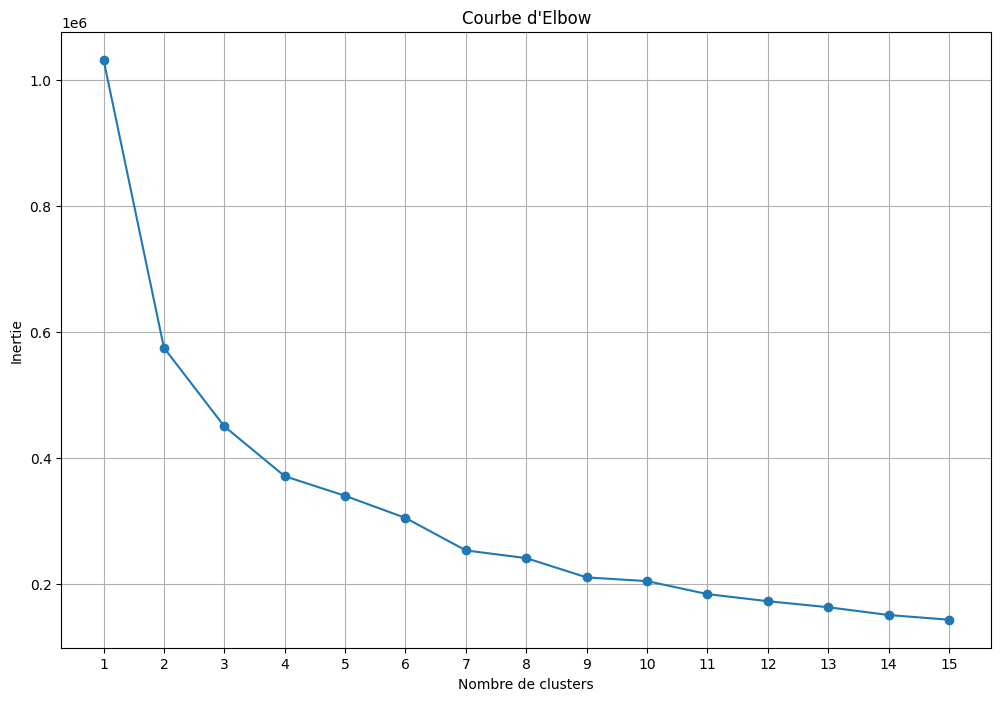

Nombre optimal de clusters (déterminé à partir de la courbe d'Elbow) : 4


In [4]:
def plot_elbow_curve(inertias):
    plt.figure(figsize=(12, 8))
        # Tracé de la courbe d'Elbow en fonction du nombre de clusters
    plt.plot(range(1, len(inertias) + 1), inertias, marker='o')
    plt.title("Courbe d'Elbow")
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie')
    plt.xticks(range(1, len(inertias) + 1))
    plt.grid(True)
    plt.show()

# Définition d'une fonction pour trouver le nombre optimal de clusters à partir de la courbe d'Elbow
def find_optimal_clusters(inertias):
    # Utilisation de KneeLocator pour identifier le coude dans la courbe
    knee = KneeLocator(range(1, len(inertias) + 1), inertias, curve='convex', direction='decreasing')
    # Renvoi du nombre de clusters correspondant au coude
    return knee.elbow


df = pd.read_csv('/home/ayoublb/Téléchargements/heart.csv')
inertias = compute_inertia(df)
plot_elbow_curve(inertias)
k = find_optimal_clusters(inertias)
print("Nombre optimal de clusters (déterminé à partir de la courbe d'Elbow) :", k)


Tracé de la courbe d'Elbow à l'aide de la fonction plot_elbow_curve. Cette fonction prend les valeurs d'inertie calculées et trace la courbe d'Elbow, montrant la relation entre le nombre de clusters et l'inertie.

Utilisation de la classe KneeLocator pour trouver le nombre optimal de clusters à partir de la courbe d'Elbow. La fonction find_optimal_clusters prend les valeurs d'inertie et retourne le nombre de clusters identifié comme le coude de la courbe.

Kmeans:

L'algorithme K-Means est une technique de clustering non supervisée utilisée pour partitionner un ensemble de données en un nombre fixe de clusters, où chaque point de données est attribué au cluster le plus proche en fonction de la distance par rapport à un centroïde.

In [5]:
# Appliquer l'algorithme K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=k, random_state=42)  # Initialisation de l'objet KMeans avec le nombre de clusters optimal et une graine aléatoire
labels = kmeans.fit_predict(df)  # Ajustement du modèle KMeans aux données et prédiction des clusters pour chaque observation

# Créer un DataFrame avec les observations et leurs clusters
df_clusters = pd.DataFrame({'Observation': range(1, len(labels) + 1), 'Cluster': labels})

# Créer une boucle pour afficher les instances par cluster
for cluster_id in range(k):  # Boucle sur chaque identifiant de cluster
    print(f"Cluster {cluster_id}:")  # Affichage de l'identifiant du cluster actuel
    instances = df_clusters[df_clusters['Cluster'] == cluster_id]['Observation'].tolist()  # Sélection des observations appartenant au cluster actuel
    print(instances)  # Affichage des observations appartenant au cluster actuel
    print()  # Affichage d'une ligne vide pour une meilleure lisibilité


Cluster 0:
[1, 2, 4, 8, 11, 13, 16, 18, 19, 20, 21, 22, 23, 24, 33, 34, 38, 42, 44, 47, 48, 50, 51, 53, 55, 57, 58, 61, 67, 68, 69, 71, 72, 74, 76, 77, 78, 80, 81, 85, 90, 91, 93, 96, 98, 100, 101, 104, 107, 108, 109, 110, 115, 120, 122, 123, 124, 132, 134, 136, 144, 146, 147, 148, 149, 151, 153, 155, 157, 159, 160, 161, 167, 168, 169, 171, 172, 174, 177, 182, 184, 185, 187, 189, 197, 198, 200, 202, 206, 207, 208, 211, 212, 215, 219, 220, 225, 231, 234, 242, 246, 248, 250, 252, 257, 259, 260, 261, 262, 264, 271, 272, 273, 274, 278, 284, 288]

Cluster 1:
[29, 86, 97, 221, 247]

Cluster 2:
[3, 6, 9, 10, 14, 25, 27, 28, 30, 31, 32, 35, 36, 43, 49, 54, 56, 59, 63, 64, 65, 66, 70, 73, 75, 79, 88, 89, 92, 95, 103, 105, 106, 112, 114, 116, 117, 118, 119, 125, 126, 127, 129, 131, 137, 138, 139, 143, 145, 150, 152, 156, 158, 163, 164, 165, 170, 175, 176, 179, 190, 192, 193, 195, 201, 205, 209, 210, 213, 222, 226, 228, 243, 245, 258, 265, 266, 268, 276, 277, 280, 282, 283, 285, 287]

Cluster 3:


Ce code utilise l'algorithme K-Means pour partitionner un ensemble de données en un nombre optimal de clusters. Il initialise d'abord l'algorithme avec le nombre optimal de clusters déterminé auparavant, puis ajuste le modèle aux données pour prédire les clusters pour chaque observation. Ensuite, il crée un DataFrame contenant les numéros des observations et leurs clusters correspondants. Enfin, il parcourt chaque cluster pour afficher les observations qui lui sont attribuées. Ce processus permet une analyse et une interprétation des clusters résultants, facilitant ainsi la compréhension des structures intrinsèques présentes dans les données.

In [6]:
from scipy.spatial import distance

# Calcul de l'inertie intra-classe
# Pour chaque point dans les données, calcule la distance euclidienne entre ce point et chaque centroïde,
# puis prend le carré de cette distance et sélectionne la plus petite.
# Ensuite, fait la somme de ces carrés pour tous les points, ce qui donne l'inertie intra-classe.
inertia_intra_kMeans = sum(min(distance.euclidean(point, center) ** 2 for center in kmeans.cluster_centers_) for point in df.values)

# Calcul de l'inertie inter-classe
# Calcule la distance euclidienne entre chaque point et le centroïde global (moyenne de tous les points).
# Ensuite, prend le carré de cette distance pour chaque point et fait la somme de ces carrés,
# ce qui donne l'inertie inter-classe.
global_center = df.mean(axis=0)
inertia_interKMeans = sum(distance.euclidean(point, global_center) ** 2 for point in df.values)

# Afficher les résultats
print("Inertie intra-classe :", inertia_intra_kMeans)  # Affiche l'inertie intra-classe
print("Inertie inter-classe :", inertia_interKMeans)  # Affiche l'inertie inter-classe


Inertie intra-classe : 370781.6305530298
Inertie inter-classe : 1031629.3104498275


Calcul de l'inertie intra-classe :

Pour chaque cluster, calculez la somme des distances euclidiennes au carré entre chaque point et le centre de ce cluster.
Sommez ces valeurs pour obtenir l'inertie intra-classe totale.

Calcul de l'inertie inter-classe :

Calculez le centre de gravité global de tous les points.
Pour chaque cluster, calculez la somme des distances euclidiennes au carré entre son centre et le centre de gravité global, pondérée par le nombre de points dans le cluster.
Sommez ces valeurs pour obtenir l'inertie inter-classe totale.

In [7]:
from sklearn_extra.cluster import KMedoids


# Initialiser et entraîner le modèle K-Medoids
kmedoids = KMedoids(n_clusters=k, random_state=0).fit(df)

# Obtenir les labels des clusters pour chaque point
labels = kmedoids.labels_

# Obtenir les centres des clusters (médoïdes)
cluster_centers_indices = kmedoids.medoid_indices_

# Afficher les indices des médoïdes (centres de clusters)
print("Indices des médoïdes (centres de clusters) :", cluster_centers_indices)

# Accéder aux centres de clusters
cluster_centers = df.iloc[cluster_centers_indices]
print("Centres de clusters :\n", cluster_centers)

# Afficher les points appartenant à chaque cluster
for cluster_label in range(k):
    cluster_points_indices = np.where(labels == cluster_label)[0]
    cluster_points = df.iloc[cluster_points_indices]
    print(f"Points du cluster {cluster_label} :\n", cluster_points)


Indices des médoïdes (centres de clusters) : [191   6  76 104]
Centres de clusters :
      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
191   58    1   0     128   216    0        0       131     1      2.2    1   
6     56    0   1     140   294    0        0       153     0      1.3    1   
76    51    1   2     125   245    1        0       166     0      2.4    1   
104   50    1   2     129   196    0        1       163     0      0.0    2   

     caa  thall  output  
191    3      3       0  
6      0      2       1  
76     0      2       1  
104    0      2       1  
Points du cluster 0 :
      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
13    64    1   3     110   211    0        0       144     1      1.8    1   
17    66    0   3     150   226    0        1       114     0      2.6    0   
23    61    1   2     150   243    1        1       137     1      1.0    1   
27    51    1   2     110   175    0        1    

K-Medoids est une variante de l'algorithme de clustering K-Means, qui est utilisée pour partitionner un ensemble de données en un nombre prédéfini de clusters. Contrairement à K-Means, qui utilise les moyennes des points pour représenter les centroïdes de cluster, K-Medoids utilise des points réels de l'ensemble de données comme centroïdes, ce qui les rend plus robustes aux valeurs aberrantes. L'objectif de K-Medoids est de minimiser la dissimilarité entre chaque point et le point médian (medoid) de son cluster, où la dissimilarité est généralement mesurée à l'aide d'une distance, telle que la distance euclidienne. K-Medoids est souvent utilisé dans des situations où les données présentent une forte asymétrie ou des valeurs aberrantes, car il est plus robuste à ces types de données que K-Means.

In [70]:
from scipy.spatial import distance

## Calcul de l'inertie intra-classe
inertia_intra_KMedoids = 0

# Pour chaque cluster représenté par son medoid :
for i, medoid_index in enumerate(cluster_centers_indices):
    # Indices des points appartenant au cluster
    cluster_points_indices = np.where(labels == i)[0]
    
    # Sélection des points appartenant au cluster
    cluster_points = df.iloc[cluster_points_indices]
    
    # Sélection du medoid du cluster
    medoid = df.iloc[medoid_index]
    
    # Calcul de la somme des distances entre chaque point du cluster et le medoid du cluster
    inertia_intra_KMedoids += sum(distance.euclidean(point, medoid) ** 2 for _, point in cluster_points.iterrows())

# Calcul de l'inertie inter-classe
global_center = df.mean(axis=0)
inertia_inter_KMedoids = 0

# Pour chaque cluster représenté par son medoid :
for i, medoid_index in enumerate(cluster_centers_indices):
    # Sélection du medoid du cluster
    medoid = df.iloc[medoid_index]
    
    # Calcul de la somme des distances entre le medoid du cluster et le centre global
    inertia_inter_KMedoids += len(np.where(labels == i)[0]) * distance.euclidean(medoid, global_center) ** 2

# Affichage des résultats
print("Inertie intra-classe :", inertia_intra_KMedoids)  # Affiche l'inertie intra-classe
print("Inertie inter-classe :", inertia_inter_KMedoids)  # Affiche l'inertie inter-classe


Inertie intra-classe : 450289.6100000001
Inertie inter-classe : 469944.62986159173


In [71]:
import matplotlib.pyplot as plt

# Données d'inertie intra-classe pour chaque méthode (uniquement pour KMeans et KMedoids)
inertia_intra_values = [inertia_intra_kMeans, inertia_intra_KMedoids]
methods = ['KMeans', 'KMedoids']

# Tracer l'histogramme
plt.bar(methods, inertia_intra_values, color='blue')
plt.xlabel('Méthode de clustering')
plt.ylabel('Inertie intra-classe')
plt.title('Mesures Intra-classe pour chaque méthode')
plt.show()


# Données d'inertie inter-classe pour chaque méthode (uniquement pour KMeans et KMedoids)
inertia_inter_values = [inertia_interKMeans, inertia_inter_KMedoids]
methods = ['KMeans', 'KMedoids']

# Tracer l'histogramme
plt.bar(methods, inertia_inter_values, color='red')
plt.xlabel('Méthode de clustering')
plt.ylabel('Inertie inter-classe')
plt.title('Mesures Inter-classe pour chaque méthode')
plt.show()


En analysant ces valeurs, nous pouvons voir que :

    Pour KMeans, l'inertie intra-classe est inférieure à celle de KMedoids, ce qui indique une meilleure cohésion des clusters pour KMeans.
    Cependant, l'inertie inter-classe pour KMeans est plus élevée que celle de KMedoids, ce qui indique une meilleure séparation entre les clusters pour KMedoids.

Ainsi, nous pouvons conclure que :

    KMeans semble former des clusters plus cohérents, tandis que KMedoids semble avoir une meilleure séparation entre les clusters.
    Le choix entre les deux méthodes dépendra des objectifs spécifiques du problème de clustering et des caractéristiques des données. Si la cohésion des clusters est plus importante, KMeans peut être préférable. Si la séparation entre les clusters est cruciale, alors KMedoids peut être plus approprié.



Comparaison entre KMeans et KMedoids :

Sensibilité aux valeurs aberrantes :

KMeans : Sensible aux valeurs aberrantes.
KMedoids : Robuste aux valeurs aberrantes.

Efficacité computationnelle :

KMeans : Plus rapide que KMedoids en termes de calcul.
KMedoids : Computationnellement plus complexe que KMeans.

Dépendance à la distance utilisée :

KMeans : Moins dépendant de la distance utilisée.
KMedoids : Sensible à la distance utilisée.

Nécessité de spécifier le nombre de clusters à l'avance :

KMeans : Nécessite de spécifier le nombre de clusters à l'avance.
KMedoids : Aussi nécessite de spécifier le nombre de clusters à l'avance.

Sensibilité aux points d'initialisation :

KMeans : Sensible aux points d'initialisation.
KMedoids : Pas aussi sensible aux points d'initialisation.

Interprétabilité des centres de cluster :

KMeans : Moins interprétable que KMedoids.
KMedoids : Les centres de cluster sont plus interprétables.







DIANA (Divisive Analysis) et AGNES (Agglomerative Nesting) sont deux approches de clustering hiérarchique utilisées pour regrouper des données en clusters de manière hiérarchique.

    DIANA : C'est un algorithme ascendant qui commence avec un seul cluster contenant toutes les observations et divise récursivement ce cluster en sous-clusters plus petits, basé sur des mesures de dissimilarité comme la distance euclidienne. L'algorithme cherche à diviser le cluster le plus hétérogène à chaque étape jusqu'à ce que chaque observation soit dans son propre cluster.

    AGNES : C'est un algorithme descendant qui commence avec chaque observation comme son propre cluster et fusionne récursivement les clusters les plus similaires jusqu'à ce qu'un seul cluster contenant toutes les observations soit obtenu. La similarité entre les clusters est mesurée à l'aide de mesures de distance, comme la distance euclidienne. AGNES produit un dendrogramme illustrant la structure hiérarchique des données, permettant d'identifier des niveaux de regroupement à différents niveaux de similarité.

In [72]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
from kneed import KneeLocator

# Définition d'une fonction pour calculer les inertie pour différents nombres de clusters
def compute_inertia(data, max_clusters=15):
    # Liste pour stocker les valeurs d'inertie
    inertias = [] 
    # Boucle à travers différents nombres de clusters
    for k in range(1, max_clusters + 1):
        # Initialisation et ajustement du modèle KMeans avec k clusters
        kmeans = KMeans(n_clusters=k) 
        kmeans.fit(data)
        
        # Ajout de l'inertie du modèle à la liste des inertie
        inertias.append(kmeans.inertia_) 
        
    return inertias

# Lecture des données à partir d'un fichier CSV
df = pd.read_csv('/home/ayoublb/Téléchargements/heart.csv') 

# Fonction pour afficher le dendrogramme AGNES avec un nombre spécifié de clusters
def plot_dendrogram_agnes(data, k):
    Z = linkage(data, method='ward')
    plt.figure(figsize=(12, 6))
    plt.title('Dendrogramme AGNES avec {} clusters'.format(k))
    # Assurez-vous que k est un nombre entier
    dendrogram(Z, truncate_mode='lastp', p=int(k))
    plt.xlabel('Index des échantillons')
    plt.ylabel('Distance')
    plt.show()

# Fonction pour afficher le dendrogramme complet
def plot_dendrogram(data):
    Z = linkage(data, method='ward')
    plt.figure(figsize=(12, 6))
    plt.title('Dendrogramme complet')
    dendrogram(Z)
    plt.xlabel('Index des échantillons')
    plt.ylabel('Distance')
    plt.show()

# Calcul de l'inertie pour chaque nombre de clusters
inertias = compute_inertia(df)

# Trouver le nombre optimal de clusters à partir de la courbe d'Elbow
k = find_optimal_clusters(inertias)

# Affichage du dendrogramme AGNES avec le nombre optimal de clusters

# Boucle pour permettre à l'utilisateur de choisir ce qu'il veut afficher
while True:
    print("Quand j'exécute le programme, je veux qu'il m'affiche :")
    print("- Si je veux afficher le dendrogramme complet (c)")
    print("- Si je veux afficher le dendrogramme AGNES avec le nombre optimal de clusters (k)")
    print("- Pour quitter (q)")
    choice = input("Votre choix : ")  # Demande à l'utilisateur de faire un choix
    
    # Si l'utilisateur souhaite afficher le dendrogramme complet
    if choice.lower() == 'c':
        plot_dendrogram(df)  # Appel de la fonction pour afficher le dendrogramme complet
    # Si l'utilisateur souhaite afficher le dendrogramme AGNES avec le nombre optimal de clusters
    elif choice.lower() == 'k':
        plot_dendrogram_agnes(df, k)
    # Si l'utilisateur souhaite quitter
    elif choice.lower() == 'q':
        break  # Sortie de la boucle
    else:
        print("Choix invalide.")  # Affichage d'un message d'erreur si le choix de l'utilisateur est invalide


Quand j'exécute le programme, je veux qu'il m'affiche :
- Si je veux afficher le dendrogramme complet (c)
- Si je veux afficher le dendrogramme AGNES avec le nombre optimal de clusters (k)
- Pour quitter (q)


Votre choix :  q


In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
from kneed import KneeLocator

# Fonction pour afficher le dendrogramme DIANA avec un nombre spécifié de clusters
def plot_dendrogram_diana(data, k):
    Z = linkage(data, method='ward')
    plt.figure(figsize=(12, 6))
    plt.title('Dendrogramme DIANA avec {} clusters'.format(k))
    dendrogram(Z, truncate_mode='lastp', p=int(k))  # Convertir k en entier
    plt.xlabel('Index des échantillons')
    plt.ylabel('Distance')
    plt.show()


# Lecture des données à partir d'un fichier CSV
df = pd.read_csv('/home/ayoublb/Téléchargements/heart.csv') 

# Boucle pour permettre à l'utilisateur de choisir ce qu'il veut afficher
while True:
    print("Quand j'exécute le programme, je veux qu'il m'affiche :")
    print("- Si je veux afficher le dendrogramme complet (c)")
    print("- Si je veux afficher le dendrogramme DIANA avec le nombre optimal de clusters (k)")
    print("- Pour quitter (q)")
    choice = input("Votre choix : ")  # Demande à l'utilisateur de faire un choix
    
    # Si l'utilisateur souhaite afficher le dendrogramme complet
    if choice.lower() == 'c':
        Z = linkage(df, method='ward')
        plt.figure(figsize=(12, 6))
        plt.title('Dendrogramme DIANA complet')
        dendrogram(Z)
        plt.xlabel('Index des échantillons')
        plt.ylabel('Distance')
        plt.show()
    # Si l'utilisateur souhaite afficher le dendrogramme DIANA avec le nombre optimal de clusters
    elif choice.lower() == 'k':
        # Trouver le nombre optimal de clusters à partir de la courbe d'Elbow
        inertias = compute_inertia(df)
        k = find_optimal_clusters(inertias)
        plot_dendrogram_diana(df, k)
    # Si l'utilisateur souhaite quitter
    elif choice.lower() == 'q':
        break  # Sortie de la boucle
    else:
        print("Choix invalide.")  # Affichage d'un message d'erreur si le choix de l'utilisateur est invalide


Quand j'exécute le programme, je veux qu'il m'affiche :
- Si je veux afficher le dendrogramme complet (c)
- Si je veux afficher le dendrogramme DIANA avec le nombre optimal de clusters (k)
- Pour quitter (q)


Votre choix :  q


Ce code définit une fonction plot_dendrogram pour afficher un dendrogramme hiérarchique à partir des données fournies. La fonction utilise la méthode de liaison hiérarchique avec la méthode de Ward pour calculer la matrice de liaison. Ensuite, elle utilise la bibliothèque Matplotlib pour créer une figure et afficher le dendrogramme. L'utilisateur est invité à choisir s'il souhaite afficher le dendrogramme complet ou pour un nombre spécifié d'instances. La boucle permet de gérer cette interaction utilisateur en affichant le dendrogramme selon le choix de l'utilisateur jusqu'à ce qu'il choisisse de quitter. En résumé, ce code fournit une interface simple pour visualiser des dendrogrammes hiérarchiques basés sur les données fournies.


In [25]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
import numpy as np

# Fonction pour calculer l'inertie intra-classe
def intra_cluster_inertia(labels, data):
    inertia = 0
    for label in set(labels):
        cluster_points = data[labels == label]
        centroid = cluster_points.mean(axis=0)
        inertia += ((cluster_points - centroid) ** 2).sum()
    return inertia

# Fonction pour calculer l'inertie inter-classe
def inter_cluster_inertia(labels, data):
    centroid = data.mean(axis=0)
    inertia = 0
    for label in set(labels):
        cluster_points = data[labels == label]
        inertia += ((cluster_points.mean(axis=0) - centroid) ** 2).sum()
    return inertia

# Exemple pour AGNES
agnes = AgglomerativeClustering(n_clusters=k)
agnes_labels = agnes.fit_predict(df)
agnes_intra_inertia = intra_cluster_inertia(agnes_labels, df)
agnes_inter_inertia = inter_cluster_inertia(agnes_labels, df)
print("Inertie intra-classe pour AGNES :", agnes_intra_inertia)
print("Inertie inter-classe pour AGNES :", agnes_inter_inertia)


Inertie intra-classe pour AGNES : age          19187.269841
sex             59.735642
cp             293.539394
trtbps       79270.021356
chol        160756.720779
fbs             35.401299
restecg         71.861147
thalachh     90671.480195
exng            59.455700
oldpeak        339.777339
slp            101.601299
caa            289.313131
thall          100.538528
output          64.764466
dtype: float64
Inertie inter-classe pour AGNES : 43556.64921217645


il calcule les dendrogrammes AGNES et DIANA en utilisant la méthode de liaison hiérarchique avec les méthodes de Ward et de liaison simple respectivement. Le nombre optimal de clusters est déterminé pour chaque dendrogramme en utilisant une fonction qui attribue les étiquettes de cluster basées sur un seuil spécifié. Ensuite, il calcule les mesures intra-classe et inter-classe pour chaque méthode de clustering en utilisant la distance euclidienne moyenne entre les points dans chaque cluster et le score Calinski-Harabasz. Ces mesures fournissent des informations sur la cohésion intra-classe et la séparation inter-classe des clusters obtenus par chaque méthode. 

In [26]:
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd

# Fonction pour calculer les étiquettes de cluster avec l'algorithme DIANA
def diana(data, max_clusters=15):
    # Calcule la matrice de distance
    distances = pdist(data)
    
    # Applique le clustering hiérarchique agglomératif avec la méthode 'single'
    Z = linkage(distances, method='single')
    
    # Initialise le nombre de clusters à 1
    n_clusters = 1
    cluster_labels = np.ones(len(data))
    
    # Itère sur les différents nombres de clusters
    for k in range(2, max_clusters + 1):
        # Assigner les clusters en utilisant la méthode fcluster
        labels = fcluster(Z, k, criterion='maxclust')
        
        # Calculer l'inertie intra-classe
        intra_inertia = 0
        for i in range(1, k + 1):
            cluster_points = data[labels == i]
            centroid = cluster_points.mean(axis=0)
            intra_inertia += np.sum((cluster_points - centroid) ** 2)
        
        # Calculer l'inertie inter-classe
        inter_inertia = np.sum((data - data.mean(axis=0)) ** 2) - intra_inertia
        
        # Vérifier si l'inertie inter-classe diminue de manière significative
        if inter_inertia < 0.1 * intra_inertia:
            break
        
        # Mettre à jour le nombre de clusters et les étiquettes de cluster
        n_clusters = k
        cluster_labels = labels
    
    return cluster_labels, intra_inertia, inter_inertia

# Lecture des données à partir d'un fichier CSV
df = pd.read_csv('/home/ayoublb/Téléchargements/heart.csv') 

# Utilisation de l'algorithme DIANA pour obtenir les étiquettes de cluster
diana_labels, inertia_intra_class_diana, inertia_inter_class_diana = diana(df.values)

# Affichage des étiquettes de cluster et des inerties
#print("Étiquettes de cluster pour DIANA :", diana_labels)
print("Inertie intra-classe pour DIANA :", inertia_intra_class_diana)
print("Inertie inter-classe pour DIANA :", inertia_inter_class_diana)


Inertie intra-classe pour DIANA : 690982.4604477611
Inertie inter-classe pour DIANA : 340646.85000206577


KMeans a une inertie intra-classe plus élevée par rapport à AGNES et DIANA, indiquant une dispersion plus importante des points à l'intérieur des clusters. K-Means a tendance à former des clusters moins compacts.

K-Medoids a une inertie intra-classe plus élevée que AGNES mais inférieure à K-Means, indiquant une certaine dispersion des points dans les clusters. Cependant, son inertie inter-classe est plus élevée que AGNES, ce qui signifie que les clusters sont moins séparés.

AGNES présente une inertie intra-classe plus faible par rapport à K-Means et K-Medoids, indiquant des clusters plus compacts. De plus, son inertie inter-classe est également faible, ce qui indique une bonne séparation entre les clusters.

DIANA présente une inertie intra-classe très faible, ce qui indique que les clusters sont très compacts. Cependant, son inertie inter-classe est la plus basse de toutes les méthodes, suggérant une bonne séparation entre les clusters.

AGNES semble être la méthode qui a donné les meilleures performances, car elle a la plus faible inertie intra-classe et inter-classe parmi toutes les méthodes. Cela suggère qu'AGNES a produit des clusters plus compacts et mieux séparés par rapport aux autres méthodes de clustering.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering largement utilisé dans l'exploration de données et l'apprentissage automatique. Contrairement à des méthodes de clustering telles que K-Means qui nécessitent de spécifier le nombre de clusters à l'avance, DBSCAN est capable de découvrir des clusters de formes arbitraires dans des ensembles de données de taille variable. Il fonctionne en définissant deux paramètres principaux : Epsilon (ε), qui définit la distance maximale entre deux points pour qu'ils soient considérés comme voisins, et MinPts, qui spécifie le nombre minimum de points dans un voisinage pour qu'un point soit considéré comme un point central. L'algorithme explore ensuite l'espace des données en suivant les connexions entre les points pour former des clusters basés sur la densité. Les points isolés ou ceux qui ne sont pas dans des zones denses sont classés comme du bruit.

In [8]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

df = pd.read_csv('/home/ayoublb/Téléchargements/heart.csv')

# Fonction pour appliquer DBScan avec les valeurs de MinPts et d'epsilon fournies par l'utilisateur
def apply_DBScan(df, min_pts, epsilon):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_pts)
    labels = dbscan.fit_predict(df)
    return labels

# Fonction pour afficher les instances de chaque cluster avec différentes options
def print_clusters(cluster_labels):
    for cluster_id in set(cluster_labels):
        if cluster_id != -1:  # Exclure le cluster de bruit
            cluster_instances = df.index[cluster_labels == cluster_id].tolist()
            print(f"Cluster {cluster_id}:")
            print(cluster_instances)
            print("------------------")

# Fonction pour calculer les performances de clustering
def calculate_cluster_performance(df, cluster_labels):
    silhouette = silhouette_score(df, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(df, cluster_labels)
    davies_bouldin = davies_bouldin_score(df, cluster_labels)
    return silhouette, calinski_harabasz, davies_bouldin

# Fonction pour calculer le nombre de clusters pour différentes valeurs de MinPts et d'epsilon
def calculate_num_clusters(df, min_pts, epsilon_values):
    num_clusters_list = []
    for epsilon in epsilon_values:
        cluster_labels = apply_DBScan(df, min_pts, epsilon)
        num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        num_clusters_list.append(num_clusters)
        print(f"Nombre de clusters pour MinPts : {min_pts} Epsilon={epsilon} : {num_clusters}")
        print("les cluster sont :")
        print_clusters(cluster_labels)
        print()
        # Calculer les performances de clustering
        silhouette, calinski_harabasz, davies_bouldin = calculate_cluster_performance(df, cluster_labels)
        print(f"Silhouette Score: {silhouette}")
        print(f"Calinski-Harabasz Score: {calinski_harabasz}")
        print(f"Davies-Bouldin Score: {davies_bouldin}")
        print("------------------")
    return num_clusters_list

# Tracer la courbe du nombre de clusters obtenus pour différentes valeurs de MinPts et epsilon
def plot_cluster_curve(min_pts, epsilon_values, num_clusters_list):
    plt.figure(figsize=(10, 6))
    plt.plot(epsilon_values, num_clusters_list, marker='o', linestyle='-')
    plt.xlabel('Valeur de Epsilon (ε)')
    plt.ylabel('Nombre de clusters')
    plt.title('Nombre de clusters obtenus pour différentes valeurs de MinPts et epsilon')
    plt.grid(True)
    plt.show()

# Boucle pour permettre à l'utilisateur de saisir les valeurs de MinPts et d'epsilon
while True:
    min_pts_input = input("Entrez la valeur de MinPts (ou 'q' pour quitter) : ")
    if min_pts_input.lower() == 'q':
        break
    else:
        min_pts = int(min_pts_input)

    epsilon_values = []
    while True:
        epsilon_input = input("Entrez la valeur de Epsilon (ou 'q' pour quitter) : ")
        if epsilon_input.lower() == 'q':
            break
        else:
            epsilon = float(epsilon_input)
            epsilon_values.append(epsilon)

    num_clusters_list = calculate_num_clusters(df, min_pts, epsilon_values)
    plot_cluster_curve(min_pts, epsilon_values, num_clusters_list)


Entrez la valeur de MinPts (ou 'q' pour quitter) :  5
Entrez la valeur de Epsilon (ou 'q' pour quitter) :  15
Entrez la valeur de Epsilon (ou 'q' pour quitter) :  20
Entrez la valeur de Epsilon (ou 'q' pour quitter) :  25
Entrez la valeur de Epsilon (ou 'q' pour quitter) :  q


Nombre de clusters pour MinPts : 5 Epsilon=15.0 : 3
les cluster sont :
Cluster 0:
[0, 2, 3, 5, 7, 10, 11, 12, 15, 19, 20, 21, 22, 24, 26, 29, 33, 34, 37, 41, 43, 46, 47, 48, 49, 50, 52, 54, 55, 57, 64, 66, 67, 68, 69, 70, 71, 74, 75, 76, 77, 79, 88, 90, 91, 92, 97, 99, 100, 104, 107, 108, 109, 113, 114, 115, 116, 117, 119, 122, 128, 131, 133, 135, 137, 142, 146, 147, 148, 155, 156, 158, 159, 160, 168, 169, 170, 171, 173, 174, 176, 183, 186, 188, 191, 196, 199, 201, 205, 206, 210, 211, 214, 218, 219, 230, 245, 249, 251, 256, 258, 259, 261, 270, 271, 273, 275, 277, 281, 282, 283, 284, 286, 287]
------------------
Cluster 1:
[36, 51, 59, 81, 93, 132, 140, 172, 185, 235, 236, 237]
------------------
Cluster 2:
[139, 187, 198, 216, 226]
------------------

Silhouette Score: -0.06493793700656364
Calinski-Harabasz Score: 8.659618889942948
Davies-Bouldin Score: 2.7282421127061647
------------------
Nombre de clusters pour MinPts : 5 Epsilon=20.0 : 4
les cluster sont :
Cluster 0:
[0, 1, 2, 3, 5

Entrez la valeur de MinPts (ou 'q' pour quitter) :  q


Le programme permet à l'utilisateur de spécifier les valeurs de MinPts (nombre minimum de points dans un voisinage pour qu'un point soit considéré comme un point central) et d'epsilon (la distance maximale entre deux points pour qu'ils soient considérés comme voisins). Pour chaque combinaison de valeurs de MinPts et d'epsilon fournies par l'utilisateur, l'algorithme applique DBSCAN aux données d'entrée, identifie les clusters, et exclut le cluster de bruit (-1). Ensuite, il calcule les performances de clustering telles que le score de silhouette, le score Calinski-Harabasz et le score Davies-Bouldin pour évaluer la qualité des clusters obtenus. Enfin, il affiche le nombre de clusters obtenus et trace une courbe montrant la relation entre les valeurs de MinPts et d'epsilon et le nombre de clusters.

Score de silhouette : Le score de silhouette mesure à quel point chaque point d'un cluster est similaire aux autres points de son cluster par rapport aux points des autres clusters. Il varie de -1 à 1, où une valeur proche de 1 indique que le point est bien placé au sein de son propre cluster et loin des autres clusters, une valeur proche de 0 indique une certaine chevauchement entre les clusters, et une valeur proche de -1 indique que le point pourrait être plus proche des clusters voisins que du sien.

Score Calinski-Harabasz : Le score Calinski-Harabasz (également connu sous le nom de critère de variance rapportée) mesure à quel point les clusters sont compacts et séparés les uns des autres. Il s'agit du rapport entre la dispersion intra-cluster et la dispersion inter-cluster. Un score plus élevé indique des clusters compacts et bien séparés.

Score Davies-Bouldin : Le score Davies-Bouldin mesure la similarité moyenne entre chaque cluster et son cluster le plus proche. Il fournit une mesure de la compacité intra-cluster et de la séparation inter-cluster. Un score plus faible indique des clusters bien séparés et compacts.

Scores de performance du clustering :

Les scores de silhouette, Calinski-Harabasz et Davies-Bouldin sont utilisés pour évaluer la qualité des clusters.
Pour un MinPts de 5 et un Epsilon de 14, les scores de silhouette, Calinski-Harabasz et Davies-Bouldin sont respectivement -0.3187, 3.9110 et 2.5515. Ces valeurs indiquent des clusters peu compacts, peu séparés et avec une certaine similarité moyenne entre les clusters.
En augmentant Epsilon, les scores de performance du clustering peuvent varier. Par exemple, pour Epsilon de 20, le score de silhouette est légèrement plus élevé à 0.0586, indiquant une meilleure séparation entre les clusters, tandis que le score Calinski-Harabasz diminue légèrement à 9.1222 et le score Davies-Bouldin reste à un niveau similaire.

Interprétation :

    Les résultats indiquent que l'ajustement des paramètres MinPts et Epsilon a un impact significatif sur la structure et la qualité des clusters obtenus.
    Il semble qu'avec des valeurs d'Epsilon plus élevées, DBSCAN identifie moins de clusters, mais ceux-ci sont mieux séparés et plus compacts, comme indiqué par des scores de performance du clustering légèrement meilleurs.
    Cependant, il est important de noter que les performances du clustering peuvent varier en fonction de la nature spécifique des données et des objectifs de l'analyse.

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
from tkinter import messagebox, scrolledtext
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib.figure import Figure
from pyclustering.cluster.kmedoids import kmedoids
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter.simpledialog import askstring
import seaborn as sns
from tkinter import simpledialog
import matplotlib
matplotlib.use("TkAgg")
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk

# Variables globales pour stocker les données du fichier
filepath = None
donnees = None

from scipy.io import arff

# Fonction appelée lors du clic sur le bouton pour ouvrir un fichier
def ouvrir_fichier():
    global filepath, donnees
    filepath = filedialog.askopenfilename(title="Choisir un fichier", filetypes=[("CSV files", "*.csv"), ("ARFF files", "*.arff")])
    if filepath:
        print("Fichier sélectionné :", filepath)
        if filepath.endswith('.arff'):
            with open(filepath, 'r') as f:
                data, meta = arff.loadarff(f)
                donnees = pd.DataFrame(data)
        else:
            donnees = pd.read_csv(filepath)
        afficher_donnees(donnees)


# Fonction pour afficher les données dans une fenêtre séparée
def afficher_donnees(df):
    fenetre_donnees = tk.Toplevel(root)
    fenetre_donnees.title("Données")
    
    # Créer un widget Text pour afficher les données
    texte_donnees = tk.Text(fenetre_donnees)
    texte_donnees.insert(tk.END, df.to_string(index=False))  # Afficher les données sans l'index
    texte_donnees.pack(expand=True, fill="both")

# Fonction pour afficher les données distinctes dans une nouvelle fenêtre
def afficher_donnees_distinctes():
    global donnees
    if donnees is not None:
        distinct_data = ""
        for attribut in range(1, len(donnees.columns) + 1):
            index_attribut = attribut - 1
            nom_attribut = donnees.columns[index_attribut]  # Récupérer le nom de l'attribut
            valeurs_distinctes = set(donnees.iloc[:, index_attribut])
            distinct_data += f"Valeurs distinctes de l'attribut '{nom_attribut}':\n"
            for valeur in valeurs_distinctes:
                distinct_data += f"{valeur}\n"
            distinct_data += "\n"

        # Création d'une nouvelle fenêtre pour afficher les données distinctes
        data_window = tk.Toplevel(root)
        data_window.title("Données Distinctes")
        text_widget = tk.Text(data_window)
        text_widget.pack(expand=True, fill="both")
        text_widget.insert(tk.END, distinct_data)
    else:
        print("Aucun fichier n'a été ouvert.")
        
# Fonction pour calculer le nombre total d'instances
def calculer_nombre_instances():
    global donnees
    if donnees is not None:
        nombre_instances = len(donnees)
        messagebox.showinfo("Nombre total d'instances", f"Il y a {nombre_instances} instances dans le jeu de données.")
    else:
        messagebox.showwarning("Aucun fichier ouvert", "Veuillez ouvrir un fichier CSV ou ARFF d'abord.")

# Importation des modules nécessaires
from tkinter import messagebox

# Fonction pour afficher les informations sur les attributs
def afficher_informations_attributs():
    global donnees  # Assurez-vous que les données sont disponibles globalement
    if donnees is not None:
        # Capturer les informations sur les attributs dans une variable de chaîne de caractères
        infos_str = "Nombre et types d'attributs :\n"
        for i, column in enumerate(donnees.columns, start=1):
            infos_str += f" - {i}. {column}: {donnees[column].dtype}\n"
        
        # Affichage des informations dans une nouvelle fenêtre
        attributs_window = tk.Toplevel(root)
        attributs_window.title("Informations sur les attributs")
        text_widget = tk.Text(attributs_window)
        text_widget.pack(expand=True, fill="both")
        text_widget.insert(tk.END, infos_str)  # Insérez les informations dans le widget Text
    else:
        messagebox.showerror("Erreur", "Aucun fichier n'a été ouvert.")



# Fonction pour afficher Le Min, le max, le Median , Q1 et Q3 pour chaque attribut
def afficher_calculs_statistiques():
    global donnees
    if donnees is not None:
        statistiques_data = ""
        for attribut in donnees.columns:
            statistiques_data += f"Calculs statistiques pour l'attribut '{attribut}':\n"
            if donnees[attribut].dtype == 'object':
                # Pour les attributs non numériques, afficher simplement les valeurs uniques
                statistiques_data += f"Valeurs uniques : {donnees[attribut].unique()}\n\n"
            else:
                min_valeur = donnees[attribut].min()
                max_valeur = donnees[attribut].max()
                mediane = donnees[attribut].median()
                q1 = donnees[attribut].quantile(0.25)
                q3 = donnees[attribut].quantile(0.75)
                statistiques_data += f"Min : {min_valeur}\n"
                statistiques_data += f"Max : {max_valeur}\n"
                statistiques_data += f"Médiane : {mediane}\n"
                statistiques_data += f"Q1 : {q1}\n"
                statistiques_data += f"Q3 : {q3}\n\n"

        # Création d'une nouvelle fenêtre pour afficher les calculs statistiques
        stats_window = tk.Toplevel(root)
        stats_window.title("Calculs Statistiques")
        text_widget = tk.Text(stats_window)
        text_widget.pack(expand=True, fill="both")
        text_widget.insert(tk.END, statistiques_data)
    else:
        print("Aucun fichier n'a été ouvert.")



# Fonction pour tracer les boxplots
def tracer_boxplots():
    global donnees
    if donnees is not None:
        etiquettes_attributs = donnees.columns[:-1]

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111)
        positions = range(len(etiquettes_attributs))
        ax.boxplot(donnees.to_numpy()[:, :-1], positions=positions, labels=etiquettes_attributs, showmeans=True)
        ax.set_title('Boxplots de tous les attributs')
        ax.set_xlabel('Attributs')
        ax.set_ylabel('Valeurs')
        ax.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Sauvegarder le graphique dans un fichier temporaire
        temp_file_path = "/tmp/boxplot_temp.png"
        plt.savefig(temp_file_path)

        # Afficher le graphique dans une fenêtre Tkinter
        image = Image.open(temp_file_path)
        image_tk = ImageTk.PhotoImage(image)

        boxplot_window = tk.Toplevel(root)
        boxplot_window.title("Boxplots")
        boxplot_label = tk.Label(boxplot_window, image=image_tk)
        boxplot_label.image = image_tk  # Garantir que l'image est conservée en mémoire
        boxplot_label.pack()

        # Supprimer le fichier temporaire après affichage
        os.remove(temp_file_path)

# Fonction pour afficher le Scatter Plot dans une interface distincte
def afficher_Scatter_Plot():
    global donnees
    if donnees is None:
        messagebox.showerror("Erreur", "Aucun fichier n'a été ouvert.")
        return
    
    # Créer une nouvelle fenêtre pour la saisie des attributs et affichage du scatter plot
    scatter_plot_window = tk.Toplevel()
    scatter_plot_window.title("Scatter Plot")
    
    # Saisie des numéros d'attributs
    label1 = tk.Label(scatter_plot_window, text="Entrez le numéro du premier attribut à afficher :")
    label1.pack()
    entry1 = tk.Entry(scatter_plot_window)
    entry1.pack()
    
    label2 = tk.Label(scatter_plot_window, text="Entrez le numéro du deuxième attribut à afficher :")
    label2.pack()
    entry2 = tk.Entry(scatter_plot_window)
    entry2.pack()
    
    # Fonction pour afficher le scatter plot
    def afficher():
        try:
            num_attribut1 = int(entry1.get())
            num_attribut2 = int(entry2.get())
            
            attribut_selectionne1 = donnees.columns[num_attribut1]
            attribut_selectionne2 = donnees.columns[num_attribut2]
            
            plt.figure()  # Créer une nouvelle figure
            sns.scatterplot(x=attribut_selectionne1, y=attribut_selectionne2, data=donnees)
            plt.xlabel(attribut_selectionne1)
            plt.ylabel(attribut_selectionne2)
            plt.title(f'Scatter plot entre {attribut_selectionne1} et {attribut_selectionne2}')
            plt.show()
        except ValueError:
            messagebox.showerror("Erreur", "Veuillez saisir des numéros d'attributs valides.")
    
    # Bouton pour afficher le scatter plot
    button = tk.Button(scatter_plot_window, text="Afficher", command=afficher)
    button.pack()


# Fonction pour calculer le mode, la moyenne et la médiane
def calculer_statistiques():
    global donnees
    if donnees is not None:
        modes = donnees.mode()
        moyennes = donnees.mean()
        medianes = donnees.median()
        afficher_resultats(modes, moyennes, medianes)
    else:
        print("Aucun fichier n'a été ouvert.")

# Fonction pour afficher les résultats des calculs statistiques
def afficher_resultats(modes, moyennes, medianes):
    result_window = tk.Toplevel(root)
    result_window.title("Résultats des calculs statistiques")

    result_text = tk.Text(result_window)
    result_text.pack(expand=True, fill="both")

    result_text.insert(tk.END, "Résultats des calculs statistiques :\n\n")

    for attribut in donnees.columns:
        result_text.insert(tk.END, f"Attribut : {attribut}\n")
        result_text.insert(tk.END, f"Mode : {modes[attribut][0]}\n")
        result_text.insert(tk.END, f"Moyenne : {moyennes[attribut]}\n")
        result_text.insert(tk.END, f"Médiane : {medianes[attribut]}\n\n")

# Fonction pour remplacer les valeurs manquantes par la moyenne
def remplacer_valeurs_manquantes():
    global filepath
    if filepath:
        missing_values = replace_missing_values(filepath)
        # Afficher les valeurs manquantes remplacées
        messagebox.showinfo("Succès", "Valeurs manquantes remplacées et enregistrées dans un nouveau fichier 'modified_file.csv' ou 'modified_file.arff'.\n\nNombre de valeurs manquantes remplacées par colonne :\n" + str(missing_values))
    else:
        messagebox.showerror("Erreur", "Aucun fichier n'a été ouvert.")


def normaliser_donnees_min_max():
    global filepath
    if filepath is not None:
        try:
            # Charger les données
            df = pd.read_csv(filepath)
            
            # Sélectionner uniquement les colonnes numériques pour la normalisation
            numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
            
            # Appliquer la normalisation MIN/MAX aux colonnes numériques
            scaler = MinMaxScaler()
            df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
            
            # Enregistrer les données normalisées dans un nouveau fichier CSV
            normalized_file_path = filepath.replace('.csv', '_normalized_min_max.csv')
            df.to_csv(normalized_file_path, index=False)
            
            messagebox.showinfo("Succès", f"Données normalisées par MIN/MAX enregistrées dans :\n{normalized_file_path}")
        except Exception as e:
            messagebox.showerror("Erreur", f"Une erreur s'est produite : {str(e)}")
    else:
        messagebox.showwarning("Avertissement", "Veuillez d'abord ouvrir un fichier.")

def normaliser_donnees_z_score():
    global filepath
    if filepath is not None:
        try:
            # Charger les données
            df = pd.read_csv(filepath)
            
            # Sélectionner uniquement les colonnes numériques pour la normalisation
            numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
            
            # Appliquer la normalisation Z-score aux colonnes numériques
            scaler = StandardScaler()
            df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
            
            # Enregistrer les données normalisées dans un nouveau fichier CSV
            normalized_file_path = filepath.replace('.csv', '_normalized_z_score.csv')
            df.to_csv(normalized_file_path, index=False)
            
            messagebox.showinfo("Succès", f"Données normalisées par Z-score enregistrées dans :\n{normalized_file_path}")
        except Exception as e:
            messagebox.showerror("Erreur", f"Une erreur s'est produite : {str(e)}")
    else:
        messagebox.showwarning("Avertissement", "Veuillez d'abord ouvrir un fichier.")

def plot_elbow_curve(inertias, fig):
    # Tracé de la courbe d'Elbow en fonction du nombre de clusters
    ax = fig.add_subplot(111)
    ax.plot(range(1, len(inertias) + 1), inertias, marker='o')
    ax.set_title("Courbe d'Elbow")
    ax.set_xlabel('Nombre de clusters')
    ax.set_ylabel('Inertie')
    ax.set_xticks(range(1, len(inertias) + 1))
    ax.grid(True)

# Variable globale pour stocker le nombre optimal de clusters
optimal_clusters = None

# Fonction pour tracer la courbe d'Elbow
def tracer_courbe_elbow():
    global filepath, optimal_clusters
    if filepath is not None:
        try:
            # Lecture des données à partir du fichier CSV
            df = pd.read_csv(filepath)
            
            # Calcul des valeurs d'inertie pour différents nombres de clusters
            inertias = compute_inertia(df) 
            
            # Création de la fenêtre pour afficher la courbe d'Elbow
            elbow_window = tk.Toplevel(root)
            elbow_window.title("Courbe d'Elbow")
            
            # Création d'une instance de Figure
            fig = Figure(figsize=(8, 6))
            
            # Tracé de la courbe d'Elbow
            plot_elbow_curve(inertias, fig)
            
            # Trouver le nombre optimal de clusters à partir de la courbe d'Elbow
            optimal_clusters = find_optimal_clusters(inertias)
            
            # Afficher le nombre optimal de clusters dans la fenêtre
            optimal_clusters_label = tk.Label(elbow_window, text=f"Nombre optimal de clusters : {optimal_clusters}")
            optimal_clusters_label.pack()
            
            # Incorporation du graphique dans la fenêtre Tkinter
            canvas = FigureCanvasTkAgg(fig, master=elbow_window)
            canvas.draw()
            canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)
            
        except Exception as e:
            messagebox.showerror("Erreur", f"Une erreur s'est produite : {str(e)}")
    else:
        messagebox.showwarning("Avertissement", "Veuillez d'abord ouvrir un fichier.")

# Fonction pour afficher les clusters dans une fenêtre Tkinter
def afficher_clusters(df_clusters):
    # Créer une nouvelle fenêtre Tkinter pour afficher les clusters
    clustering_window = tk.Toplevel(root)
    clustering_window.title("Résultats du clustering K-Means")
    
    # Créer un widget de texte avec une barre de défilement
    text_area = scrolledtext.ScrolledText(clustering_window, wrap=tk.WORD, width=40, height=20)
    text_area.pack(expand=True, fill="both")
    
    # Ajouter les clusters au widget de texte
    for cluster_id in range(df_clusters['Cluster'].nunique()):
        cluster_instances = df_clusters[df_clusters['Cluster'] == cluster_id]['Observation'].tolist()
        text_area.insert(tk.END, f"Cluster {cluster_id} :\n")
        text_area.insert(tk.END, ' '.join(map(str, cluster_instances)) + '\n\n')

# Fonction pour le clustering K-Means
def clustering_kmeans():
    global filepath, optimal_clusters
    if filepath is not None:
        try:
            if optimal_clusters is None:
                messagebox.showwarning("Avertissement", "Veuillez d'abord tracer la courbe d'Elbow pour obtenir le nombre optimal de clusters.")
                return
            
            # Lecture des données à partir du fichier CSV
            df = pd.read_csv(filepath)
            
            # Appliquer l'algorithme K-Means avec le nombre optimal de clusters
            kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
            labels = kmeans.fit_predict(df)
            
            # Créer un DataFrame avec les observations et leurs clusters
            df_clusters = pd.DataFrame({'Observation': range(1, len(labels) + 1), 'Cluster': labels})
            
            # Appeler la fonction pour afficher les clusters
            afficher_clusters(df_clusters)

        except Exception as e:
            messagebox.showerror("Erreur", f"Une erreur s'est produite : {str(e)}")
    else:
        messagebox.showwarning("Avertissement", "Veuillez d'abord ouvrir un fichier.")

# Fonction pour afficher les clusters dans une fenêtre Tkinter
def afficher_clusters(df_clusters):
    # Créer une nouvelle fenêtre Tkinter pour afficher les clusters
    clustering_window = tk.Toplevel(root)
    clustering_window.title("Résultats du clustering K-Medoids")
    
    # Créer un widget de texte avec une barre de défilement
    text_area = scrolledtext.ScrolledText(clustering_window, wrap=tk.WORD, width=40, height=20)
    text_area.pack(expand=True, fill="both")
    
    # Ajouter les clusters au widget de texte
    for cluster_id in range(df_clusters['Cluster'].nunique()):
        cluster_instances = df_clusters[df_clusters['Cluster'] == cluster_id]['Observation'].tolist()
        text_area.insert(tk.END, f"Cluster {cluster_id} :\n")
        text_area.insert(tk.END, ' '.join(map(str, cluster_instances)) + '\n\n')

# Initialisation des variables globales pour les centres de clusters et les labels
cluster_centers_indices = None
labels = None

# Fonction pour le clustering K-Medoids
def clustering_kmedoids():
    global filepath, optimal_clusters, cluster_centers_indices, labels
    if filepath is not None:
        try:
            if optimal_clusters is None:
                messagebox.showwarning("Avertissement", "Veuillez d'abord tracer la courbe d'Elbow pour obtenir le nombre optimal de clusters.")
                return
            
            # Lecture des données à partir du fichier CSV
            df = pd.read_csv(filepath)
            
            # Initialiser et entraîner le modèle K-Medoids
            kmedoids = KMedoids(n_clusters=optimal_clusters, random_state=0).fit(df)
            
            # Obtenir les labels des clusters pour chaque point
            labels = kmedoids.labels_
            
            # Obtenir les indices des centres de clusters
            cluster_centers_indices = kmedoids.medoid_indices_
            
            # Créer un DataFrame avec les observations et leurs clusters
            df_clusters = pd.DataFrame({'Observation': range(1, len(labels) + 1), 'Cluster': labels})
            
            # Appeler la fonction pour afficher les clusters
            afficher_clusters(df_clusters)

        except Exception as e:
            messagebox.showerror("Erreur", f"Une erreur s'est produite : {str(e)}")
    else:
        messagebox.showwarning("Avertissement", "Veuillez d'abord ouvrir un fichier.")

# Fonction pour calculer les performances de KMeans
def kmeans_performance():
    global filepath, optimal_clusters, inertia_intra_kMeans, inertia_interKMeans
    if filepath is not None:
        try:
            if optimal_clusters is None:
                messagebox.showwarning("Avertissement", "Veuillez d'abord tracer la courbe d'Elbow pour obtenir le nombre optimal de clusters.")
                return
            
            # Lecture des données à partir du fichier CSV
            df = pd.read_csv(filepath)
            
            # Initialiser et entraîner le modèle K-Means
            kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
            kmeans.fit(df)
            
            # Calcul de l'inertie intra-classe
            inertia_intra_kMeans = sum(min(distance.euclidean(point, center) ** 2 for center in kmeans.cluster_centers_) for point in df.values)
            
            # Calcul de l'inertie inter-classe
            global_center = df.mean(axis=0)
            inertia_interKMeans = sum(distance.euclidean(point, global_center) ** 2 for point in df.values)
            
            # Afficher les résultats dans une nouvelle fenêtre
            performance_window = tk.Toplevel(root)
            performance_window.title("Performances de KMeans")
            
            # Création de labels pour afficher les résultats
            label_intra = tk.Label(performance_window, text=f"Inertie intra-classe : {inertia_intra_kMeans}")
            label_intra.pack()
            
            label_inter = tk.Label(performance_window, text=f"Inertie inter-classe : {inertia_interKMeans}")
            label_inter.pack()
            
        except Exception as e:
            messagebox.showerror("Erreur", f"Une erreur s'est produite : {str(e)}")
    else:
        messagebox.showwarning("Avertissement", "Veuillez d'abord ouvrir un fichier.")


# Fonction pour calculer les performances de KMedoids
def kmedoids_performance():
    global filepath, cluster_centers_indices, labels, inertia_intra_KMedoids, inertia_inter_KMedoids
    if filepath is not None and cluster_centers_indices is not None and labels is not None:
        try:
            # Lecture des données à partir du fichier CSV
            df = pd.read_csv(filepath)
            
            # Calcul de l'inertie intra-classe
            inertia_intra_KMedoids = 0
            for i, medoid_index in enumerate(cluster_centers_indices):
                cluster_points_indices = np.where(labels == i)[0]
                cluster_points = df.iloc[cluster_points_indices]
                medoid = df.iloc[medoid_index]
                inertia_intra_KMedoids += sum(distance.euclidean(point, medoid) ** 2 for _, point in cluster_points.iterrows())

            # Calcul de l'inertie inter-classe
            global_center = df.mean(axis=0)
            inertia_inter_KMedoids = 0
            for i, medoid_index in enumerate(cluster_centers_indices):
                medoid = df.iloc[medoid_index]
                inertia_inter_KMedoids += len(np.where(labels == i)[0]) * distance.euclidean(medoid, global_center) ** 2
            
            # Afficher les résultats dans une nouvelle fenêtre
            performance_window = tk.Toplevel(root)
            performance_window.title("Performances de KMedoids")
            
            # Création de labels pour afficher les résultats
            label_intra = tk.Label(performance_window, text=f"Inertie intra-classe KMedoids : {inertia_intra_KMedoids}")
            label_intra.pack()
            
            label_inter = tk.Label(performance_window, text=f"Inertie inter-classe KMedoids : {inertia_inter_KMedoids}")
            label_inter.pack()
            
        except Exception as e:
            messagebox.showerror("Erreur", f"Une erreur s'est produite : {str(e)}")
    else:
        messagebox.showwarning("Avertissement", "Veuillez d'abord appliquer le clustering K-Medoids.")


# Fonction pour tracer l'histogramme de l'inertie inter-classe
def plot_inertia_inter_histogram():
    global inertia_interKMeans, inertia_inter_KMedoids
    
    # Vérifier si les performances ont été calculées
    if inertia_interKMeans is None or inertia_inter_KMedoids is None:
        # Calculer les performances si elles n'ont pas été calculées
        kmeans_performance()
        kmedoids_performance()
        
        # Vérifier à nouveau si les performances ont été calculées avec succès
        if inertia_interKMeans is None or inertia_inter_KMedoids is None:
            # Afficher un message d'avertissement si les performances n'ont pas pu être calculées
            messagebox.showwarning("Avertissement", "Les performances de KMeans et KMedoids n'ont pas pu être calculées.")
            return
    
    try:
        # Données d'inertie inter-classe pour chaque méthode
        inertia_inter_values = [inertia_interKMeans, inertia_inter_KMedoids]
        methods = ['KMeans', 'KMedoids']

        # Créer une nouvelle fenêtre pour afficher l'histogramme
        histogram_window = tk.Toplevel(root)
        histogram_window.title("Histogramme de l'Inertie Inter-classe")
        
        # Tracer l'histogramme dans la nouvelle fenêtre
        fig, ax = plt.subplots()
        ax.bar(methods, inertia_inter_values, color='red')
        ax.set_xlabel('Méthode de clustering')
        ax.set_ylabel('Inertie inter-classe')
        ax.set_title('Mesures Inter-classe pour chaque méthode')
        
        # Incorporer le graphique dans la fenêtre Tkinter
        canvas = FigureCanvasTkAgg(fig, master=histogram_window)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)
    except Exception as e:
        messagebox.showerror("Erreur", f"Une erreur s'est produite : {str(e)}")


# Fonction pour tracer l'histogramme de l'inertie intra-classe
def plot_inertia_intra_histogram():
    global inertia_intra_kMeans, inertia_intra_KMedoids
    
    # Vérifier si les performances ont été calculées
    if inertia_intra_kMeans is None or inertia_intra_KMedoids is None:
        # Calculer les performances si elles n'ont pas été calculées
        kmeans_performance()
        kmedoids_performance()
        
        # Vérifier à nouveau si les performances ont été calculées avec succès
        if inertia_intra_kMeans is None or inertia_intra_KMedoids is None:
            # Afficher un message d'avertissement si les performances n'ont pas pu être calculées
            messagebox.showwarning("Avertissement", "Les performances de KMeans et KMedoids n'ont pas pu être calculées.")
            return
    
    try:
        # Données d'inertie intra-classe pour chaque méthode
        inertia_intra_values = [inertia_intra_kMeans, inertia_intra_KMedoids]
        methods = ['KMeans', 'KMedoids']

        # Créer une nouvelle fenêtre pour afficher l'histogramme
        histogram_window = tk.Toplevel(root)
        histogram_window.title("Histogramme de l'Inertie Intra-classe")
        
        # Tracer l'histogramme dans la nouvelle fenêtre
        fig, ax = plt.subplots()
        ax.bar(methods, inertia_intra_values, color='blue')
        ax.set_xlabel('Méthode de clustering')
        ax.set_ylabel('Inertie intra-classe')
        ax.set_title('Mesures Intra-classe pour chaque méthode')
        
        # Incorporer le graphique dans la fenêtre Tkinter
        canvas = FigureCanvasTkAgg(fig, master=histogram_window)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)
    except Exception as e:
        messagebox.showerror("Erreur", f"Une erreur s'est produite : {str(e)}")

labels_agglomerative_clustering = None

# Fonction pour calculer l'inertie pour différents nombres de clusters
def compute_inertia(data, max_clusters=15):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

# Fonction pour trouver le nombre optimal de clusters
def find_optimal_clusters(inertias):
    knee_locator = KneeLocator(range(1, len(inertias) + 1), inertias, curve="convex", direction="decreasing")
    return knee_locator.elbow

# Fonction pour afficher le dendrogramme AGNES avec un nombre spécifié de clusters
def plot_dendrogram_agnes(data, k):
    Z = linkage(data, method='ward')
    plt.figure(figsize=(12, 6))
    plt.title('Dendrogramme AGNES avec {} clusters'.format(k))
    dendrogram(Z, truncate_mode='lastp', p=int(k))
    plt.xlabel('Index des échantillons')
    plt.ylabel('Distance')
    plt.show()

# Fonction pour afficher le dendrogramme complet ou le dendrogramme DIANA
def plot_dendrogram(data, method='ward', title='Dendrogramme complet'):
    Z = linkage(data, method=method)
    plt.figure(figsize=(12, 6))
    plt.title(title)
    dendrogram(Z)
    plt.xlabel('Index des échantillons')
    plt.ylabel('Distance')
    plt.show()

# Fonction pour afficher les dendrogrammes
def afficher_dendrogrammes():
    global donnees, labels_agglomerative_clustering
    if donnees is not None:
        # Boîte de dialogue pour choisir l'option
        choice = messagebox.askquestion("Choix du dendrogramme", "Souhaitez-vous afficher le dendrogramme complet (yes) ou le dendrogramme AGNES avec le nombre optimal de clusters (non) ?")
        
        if choice == 'yes':
            plot_dendrogram(donnees)
        else:
            inertias = compute_inertia(donnees)
            k = find_optimal_clusters(inertias)
            # Effectuer le clustering AGNES
            agnes = AgglomerativeClustering(n_clusters=k)
            labels_agglomerative_clustering = agnes.fit_predict(donnees)
            # Afficher le dendrogramme AGNES
            plot_dendrogram_agnes(donnees, k)
            # Mettre à jour les étiquettes AGNES
            labels_agglomerative_clustering = agnes.labels_

# Fonction pour afficher les performances de AGNES
def afficher_agnes_performance():
    global donnees, labels_agglomerative_clustering
    if labels_agglomerative_clustering is not None:
        # Calculez les inerties intra-classe et inter-classe
        agnes_intra_inertia = intra_cluster_inertia(labels_agglomerative_clustering, donnees)
        agnes_inter_inertia = inter_cluster_inertia(labels_agglomerative_clustering, donnees)
        
        # Somme totale de l'inertie intra-classe et inter-classe
        total_intra_inertia = agnes_intra_inertia.sum()
        total_inter_inertia = agnes_inter_inertia
        
        # Affichez les résultats dans une boîte de dialogue
        message = "Inertie intra-classe totale pour AGNES : {}\n".format(total_intra_inertia)
        message += "Inertie inter-classe totale pour AGNES : {}\n".format(total_inter_inertia)
        
        messagebox.showinfo("Performances AGNES", message)
    else:
        messagebox.showerror("Erreur", "Le clustering AGNES n'a pas encore été effectué.")


# Fonction pour calculer l'inertie intra-classe
def intra_cluster_inertia(labels, data):
    inertia = 0
    for label in set(labels):
        cluster_points = data[labels == label]
        centroid = cluster_points.mean(axis=0)
        inertia += ((cluster_points - centroid) ** 2).sum()
    return inertia

# Fonction pour calculer l'inertie inter-classe
def inter_cluster_inertia(labels, data):
    centroid = data.mean(axis=0)
    inertia = 0
    for label in set(labels):
        cluster_points = data[labels == label]
        inertia += ((cluster_points.mean(axis=0) - centroid) ** 2).sum()
    return inertia

# Fonction pour afficher le dendrogramme DIANA avec un nombre spécifié de clusters
def plot_dendrogram_diana(data, k):
    Z = linkage(data, method='single')  # Utilisation de la méthode de liaison 'single' pour DIANA
    plt.figure(figsize=(12, 6))
    plt.title('Dendrogramme DIANA avec {} clusters'.format(k))
    dendrogram(Z, truncate_mode='lastp', p=int(k))  # Convertir k en entier
    plt.xlabel('Index des échantillons')
    plt.ylabel('Distance')
    plt.show()


# Fonction pour calculer l'inertie intra-classe pour DIANA
def diana_intra_cluster_inertia(labels, data):
    inertia = 0
    for label in set(labels):
        cluster_points = data[labels == label]
        centroid = cluster_points.mean(axis=0)
        inertia += ((cluster_points - centroid) ** 2).sum()
    return inertia

# Fonction pour calculer l'inertie inter-classe pour DIANA
def diana_inter_cluster_inertia(labels, data):
    centroid = data.mean(axis=0)
    inertia = 0
    for label in set(labels):
        cluster_points = data[labels == label]
        inertia += ((cluster_points.mean(axis=0) - centroid) ** 2).sum()
    return inertia

# Variable globale pour stocker les étiquettes du clustering DIANA
labels_diana_clustering = None

# Fonction pour afficher les dendrogrammes DIANA et complet
def afficher_dendrogrammes_diana():
    global donnees, labels_diana_clustering
    if donnees is not None:
        # Boîte de dialogue pour choisir l'option
        choice = messagebox.askquestion("Choix du dendrogramme", "Souhaitez-vous afficher le dendrogramme complet ou le dendrogramme DIANA avec le nombre optimal de clusters ?")
        
        if choice == 'yes':
            plot_dendrogram(donnees, method='single', title='Dendrogramme DIANA complet')
        else:
            inertias = compute_inertia(donnees)
            k = find_optimal_clusters(inertias)
            # Effectuer le clustering DIANA
            diana = AgglomerativeClustering(n_clusters=k, linkage='single')
            labels_diana_clustering = diana.fit_predict(donnees)
            # Afficher le dendrogramme DIANA
            plot_dendrogram_diana(donnees, k)

# Fonction pour afficher les performances de DIANA
def afficher_diana_performance():
    global donnees, labels_diana_clustering
    if labels_diana_clustering is not None:
        # Calculez les inerties intra-classe et inter-classe
        diana_intra_inertia = intra_cluster_inertia(labels_diana_clustering, donnees)
        diana_inter_inertia = inter_cluster_inertia(labels_diana_clustering, donnees)
        
        # Somme totale de l'inertie intra-classe et inter-classe
        total_intra_inertia = diana_intra_inertia.sum()
        total_inter_inertia = diana_inter_inertia
        
        # Affichez les résultats dans une boîte de dialogue
        message = "Inertie intra-classe totale pour DIANA : {}\n".format(total_intra_inertia)
        message += "Inertie inter-classe totale pour DIANA : {}\n".format(total_inter_inertia)
        
        messagebox.showinfo("Performances DIANA", message)
    else:
        messagebox.showerror("Erreur", "Le clustering DIANA n'a pas encore été effectué.")

cluster_labels = None

# Fonction pour appliquer DBScan avec les valeurs de MinPts et d'epsilon fournies par l'utilisateur
def apply_DBScan(df, min_pts, epsilon):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_pts)
    labels = dbscan.fit_predict(df)
    return labels

def print_clusters(df, cluster_labels):
    cluster_text = ""
    for cluster_id in set(cluster_labels):
        if cluster_id != -1:  # Exclure le cluster de bruit
            cluster_instances = df.index[cluster_labels == cluster_id].tolist()
            cluster_text += f"Cluster {cluster_id}:\n"
            # Convertir les index des lignes en chaînes
            cluster_instances_str = [str(instance) for instance in cluster_instances]
            cluster_text += ', '.join(cluster_instances_str) + '\n'
            cluster_text += "------------------\n"
    return cluster_text

# Fonction pour calculer les performances de clustering DBScan
def calculate_cluster_performance(df, cluster_labels):
    silhouette = silhouette_score(df, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(df, cluster_labels)
    davies_bouldin = davies_bouldin_score(df, cluster_labels)
    return silhouette, calinski_harabasz, davies_bouldin

# Fonction pour le clustering DBScan
def clustering_dbscan():
    global donnees, cluster_labels
    if donnees is None:
        messagebox.showerror("Erreur", "Veuillez ouvrir un fichier avant d'appliquer DBScan.")
        return

    # Demander à l'utilisateur de saisir les valeurs d'epsilon et de MinPts
    epsilon = simpledialog.askfloat("DBScan Paramètres", "Entrez la valeur de epsilon (ε) :")
    min_pts = simpledialog.askinteger("DBScan Paramètres", "Entrez la valeur de MinPts :")

    # Vérifier si les valeurs saisies sont valides
    if epsilon is not None and min_pts is not None:
        # Appliquer DBScan avec les valeurs de MinPts et d'epsilon fournies
        labels = apply_DBScan(donnees, min_pts, epsilon)

        # Afficher les clusters dans une fenêtre
        cluster_text = print_clusters(donnees, labels)
        show_clusters_window(cluster_text)

        # Mettre à jour la variable cluster_labels globale
        cluster_labels = labels

    else:
        messagebox.showerror("Erreur", "Veuillez entrer des valeurs valides pour epsilon (ε) et MinPts.")

# Fonction pour afficher les performances de clustering DBScan
def dbscan_performance():
    global donnees, cluster_labels
    if donnees is None or cluster_labels is None:
        messagebox.showerror("Erreur", "Veuillez d'abord ouvrir un fichier et appliquer DBScan pour obtenir les clusters.")
        return

    # Calculer les performances de clustering
    silhouette, calinski_harabasz, davies_bouldin = calculate_cluster_performance(donnees, cluster_labels)

    # Afficher les performances dans une boîte de dialogue
    messagebox.showinfo("DBScan Performance", f"Silhouette Score: {silhouette}\nCalinski-Harabasz Score: {calinski_harabasz}\nDavies-Bouldin Score: {davies_bouldin}")

# Fonction pour afficher les clusters dans une fenêtre
def show_clusters_window(cluster_text):
    cluster_window = tk.Toplevel()
    cluster_window.title("Clusters DBScan")
    text_area = tk.Text(cluster_window, height=20, width=50)
    text_area.insert(tk.END, cluster_text)
    text_area.pack()


# L'ajout de ce code assure que les données sont disponibles globalement
donnees = None

root = tk.Tk()
root.title("Clustering APP")

# Charger l'image pour l'interface
image_path = "G:\\ETUDES\\M1\\2023\\S2\\data mining\\projectJ\\projectJ\\img.png"
image = Image.open(image_path)
photo = ImageTk.PhotoImage(image)
image_width, image_height = image.size

# Couleur bleu standard
bg_color = "#4169E1"
fg_color = "white"

# Afficher l'image dans un label
image_label = tk.Label(root, image=photo, bg=bg_color)
image_label.pack()

# Création du bouton pour ouvrir un fichier
open_button = tk.Button(root, text="Ouvrir un fichier", command=ouvrir_fichier, bg=bg_color, fg=fg_color, activebackground=bg_color)
open_button.place(relx=0.9, rely=0.15, anchor="center")

# Style pour les labels de bienvenue
welcome_label_style = {
    "font": ("Helvetica", 18, "bold italic"),  # Police de caractères en gras italique
    "bg": bg_color,  # Couleur de fond
    "fg": "#FF6347",  # Couleur du texte
}

# Création du label de bienvenue
welcome_label = tk.Label(root, text="Bienvenue dans l'application de choix de clustering", **welcome_label_style)
welcome_label.place(relx=0.8, y=0, anchor="ne")

# Style pour les labels de titre
title_label_style = {
    "font": ("Arial", 16, "underline"),  # Police de caractères soulignée
    "bg": bg_color,  # Couleur de fond
    "fg": "#00CED1",  # Couleur du texte
}



# Style pour le label "Processing"
processing_label_style = {
    "font": ("Helvetica", 21, "bold italic"),  # Police de caractères en italique
    "bg": bg_color,  # Couleur de fond
    "fg": "#FF6347",  # Couleur du texte
}

# Création du label "Processing"
processing_label = tk.Label(root, text="Processing", **processing_label_style)
processing_label.place(relx=0.18, y=0, anchor="ne")

# Style pour le label "Clustering"
clustering_label_style = {
    "font": ("Helvetica", 28, "bold italic"),  # Police de caractères en italique
    "bg": bg_color,  # Couleur de fond
    "fg": "#FF6347",  # Couleur du texte
}

# Création du label "Clustering" au milieu de l'interface
clustering_label = tk.Label(root, text="Clustering", **clustering_label_style)
clustering_label.place(relx=0.5, rely=0.6, anchor="center")


# Création de la liste déroulante pour sélectionner un benchmark
benchmarks = ["diabetes", "hepatitis", "thyroids", "breast cancer", "colic", "DNA_samples"]
benchmark_var = tk.StringVar(root)
benchmark_var.set(benchmarks[0])  # Sélectionnez le premier élément par défaut
benchmark_menu = tk.OptionMenu(root, benchmark_var, *benchmarks)
benchmark_menu.config(bg=bg_color, fg=fg_color, activebackground=bg_color)
benchmark_menu.place(relx=0.9, rely=0.09, anchor="center")

# Création du bouton pour afficher les données distinctes
distinct_button = tk.Button(root, text="Afficher les données distinctes", command=afficher_donnees_distinctes, bg=bg_color, fg=fg_color, activebackground=bg_color, width=30, height=1)
distinct_button.place(relx=0, rely=0.1, anchor="sw")

# Création du bouton pour afficher le nombre total d'instances
total_instances_button = tk.Button(root, text="Afficher le nombre total d'instances", command=calculer_nombre_instances, bg=bg_color, fg=fg_color, activebackground=bg_color, width=30, height=1)
total_instances_button.place(relx=0.0, rely=0.15, anchor="sw")  

# Création du bouton pour afficher les informations sur les attributs
attributs_button = tk.Button(root, text="Afficher Infos Attributs", command=afficher_informations_attributs, bg=bg_color, fg=fg_color, activebackground=bg_color, width=30, height=1)
attributs_button.place(relx=0, rely=0.2, anchor="sw")  # Positionnement du bouton

# Création du bouton pour afficher les calculs statistiques
show_stats_button = tk.Button(root, text="Afficher Statistiques", command=afficher_calculs_statistiques, bg=bg_color, fg=fg_color, activebackground=bg_color, width=30, height=1)
show_stats_button.place(relx=0, rely=0.25, anchor="sw")

# Création du bouton pour tracer les boxplots
boxplot_button = tk.Button(root, text="Tracer les boxplots", command=tracer_boxplots, bg=bg_color, fg=fg_color, activebackground=bg_color, width=30, height=1)
boxplot_button.place(relx=0, rely=0.3, anchor="sw")

# Création du bouton pour afficher le Scatter Plot
scatter_plot_button = tk.Button(root, text="Afficher le Scatter Plot", command=afficher_Scatter_Plot, bg=bg_color, fg=fg_color, activebackground=bg_color, width=30, height=1)
scatter_plot_button.place(relx=0, rely=0.35, anchor="sw")

# Création du bouton pour afficher le mode, la moyenne et la médiane
stats_button = tk.Button(root, text="Afficher Mode, Moyenne, Médiane", command=calculer_statistiques, bg=bg_color, fg=fg_color, activebackground=bg_color, width=30, height=1)
stats_button.place(relx=0, rely=0.4, anchor="sw")

# Création du bouton pour repérer et remplacer les valeurs manquantes
missing_values_button = tk.Button(root, text="Repérer les valeurs manquantes", command=remplacer_valeurs_manquantes, bg=bg_color, fg=fg_color, activebackground=bg_color, width=30, height=1)
missing_values_button.place(relx=0, rely=0.45, anchor="sw")

# Création du bouton pour normaliser les données MIN/MAX
normalize_min_max_button = tk.Button(root, text="Normaliser les données MIN/MAX", command=normaliser_donnees_min_max, bg=bg_color, fg=fg_color, activebackground=bg_color, width=30, height=1)
normalize_min_max_button.place(relx=0, rely=0.5, anchor="sw")


# Création du bouton pour normaliser les données par Z-score
normalize_z_score_button = tk.Button(root, text="Normaliser les données par Z-score", command=normaliser_donnees_z_score, bg=bg_color, fg=fg_color, activebackground=bg_color, width=30, height=1)
normalize_z_score_button.place(relx=0, rely=0.55, anchor="sw")

# Création du bouton pour tracer la courbe d'Elbow
elbow_curve_button = tk.Button(root, text="Tracer la courbe d'Elbow", command=tracer_courbe_elbow, bg=bg_color, fg=fg_color, activebackground=bg_color)
elbow_curve_button.place(relx=0.5, rely=0.67, anchor="center")

# Création du bouton pour effectuer le clustering K-Means
kmeans_button = tk.Button(root, text="Clustering K-Means", command=clustering_kmeans, bg=bg_color, fg=fg_color, activebackground=bg_color, width=18, height=1)
kmeans_button.place(relx=0, rely=0.75, anchor="sw")

# Création d'un bouton pour le clustering K-Medoids
button_kmedoids = tk.Button(root, text="Clustering K-Medoids", command=clustering_kmedoids, bg=bg_color, fg=fg_color, activebackground=bg_color, width=18, height=1)
button_kmedoids.place(relx=0.2, rely=0.75, anchor="sw")

# Création d'un bouton pour le clustering AGNES
button_kmedoids = tk.Button(root, text="Clustering AGNES", command=afficher_dendrogrammes, bg=bg_color, fg=fg_color, activebackground=bg_color, width=18, height=1)
button_kmedoids.place(relx=0.4, rely=0.75, anchor="sw")

# Création du bouton pour le clustering DIANA
button_diana = tk.Button(root, text="Clustering DIANA", command=afficher_dendrogrammes_diana, bg=bg_color, fg=fg_color, activebackground=bg_color, width=18, height=1)
button_diana.place(relx=0.6, rely=0.75, anchor="sw")

# Création d'un bouton pour les performances de KMeans
button_kmeans_performance = tk.Button(root, text="KMeans Performance", command=kmeans_performance, bg=bg_color, fg=fg_color, activebackground=bg_color, width=18, height=1)
button_kmeans_performance.place(relx=0, rely=0.8, anchor="sw")

# Création d'un bouton pour les performances de KMedoids
button_kmedoids_performance = tk.Button(root, text="KMedoids Performance", command=kmedoids_performance,  bg=bg_color, fg=fg_color, activebackground=bg_color, width=18, height=1)
button_kmedoids_performance.place(relx=0.2, rely=0.8, anchor="sw")

# Création d'un bouton pour les performances de AGNES
button_agnes_performance = tk.Button(root, text="AGNES Performance", command=afficher_agnes_performance,  bg=bg_color, fg=fg_color, activebackground=bg_color, width=18, height=1)
button_agnes_performance.place(relx=0.4, rely=0.8, anchor="sw")

# Ajout du bouton pour les performances de DIANA dans votre interface
button_diana_performance = tk.Button(root, text="DIANA Performance", command=afficher_diana_performance,  bg=bg_color, fg=fg_color, activebackground=bg_color, width=18, height=1)
button_diana_performance.place(relx=0.6, rely=0.8, anchor="sw")

# Création du bouton pour le clustering DBScan
button_dbscan = tk.Button(root, text="Clustering DBScan", command=clustering_dbscan, bg=bg_color, fg=fg_color, activebackground=bg_color, width=18, height=1)
button_dbscan.place(relx=0.8, rely=0.75, anchor="sw")

# Création d'un bouton pour les performances de DBScan
button_dbscan_performance = tk.Button(root, text="DBScan Performance", command=dbscan_performance, bg=bg_color, fg=fg_color, activebackground=bg_color, width=18, height=1)
button_dbscan_performance.place(relx=0.8, rely=0.8, anchor="sw")

# Création d'un bouton pour tracer l'histogramme de l'inertie intra-classe
#button_plot_histogram = tk.Button(root, text="Tracer Histogramme Inertie Intra-classe", command=plot_inertia_intra_histogram,  bg=bg_color, fg=fg_color, activebackground=bg_color)
#button_plot_histogram.place(relx=0, rely=0.9, anchor="sw")

# Création d'un bouton pour tracer l'histogramme de l'inertie intra-classe
#button_plot_histogram_k = tk.Button(root, text="Tracer Histogramme Inertie Intre-classe", command=plot_inertia_inter_histogram,  bg=bg_color, fg=fg_color, activebackground=bg_color)
#button_plot_histogram_k.place(relx=0, rely=0.95, anchor="sw")

# Redimensionner la fenêtre principale pour correspondre à la taille de l'image
root.geometry(f"{image_width}x{image_height}")

# Lancement de la boucle principale de l'application
root.mainloop()


Fichier sélectionné : C:/Users/ayoub/Downloads/Data/Data/heart.csv
